# 🎯 EDA Sensor Data of Excavator

## 📋 Mô Tả Dữ Liệu (Data Description)

### 🏗️ Nguồn Dữ Liệu (Data Source)
- **Đề tài**: Phân tích hoạt động máy xúc trong xây dựng (Becker & Keefe, 2022)
- **Số lượng tệp**: 6 tệp CSV (mỗi ngày có 3 sampling rates)
- **Sampling Rates**: 10Hz, 20Hz, 50Hz (chúng ta sử dụng 50Hz để độ chính xác cao)
- **Dữ liệu được phân tích**: Tập data có 6 ngày = 8/10, 8/11, 9/20, 9/21, 9/26, 9/27 (2022)

### 📊 Các Trường Dữ Liệu Được Dùng (Data Fields)

| Trường | Tên Đầy Đủ | Đơn Vị | Mô Tả |
|-------|-----------|-------|-------|
| **AS.Time** | Adjusted Time | HH:MM:SS.fff | Thời gian với độ chính xác millisecond |
| **Time** | Time | HH:MM:SS | Thời gian (không có millisecond) |
| **Accel.X, Y, Z** | Accelerometer XYZ | m/s² | Gia tốc theo 3 trục (X, Y, Z) từ cảm biến IMU |
| **L.Accel.X, Y, Z** | Linear Acceleration XYZ | m/s² | Gia tốc tuyến tính (loại bỏ gravity) theo 3 trục |
| **Gyro.X, Y, Z** | Gyroscope XYZ | rad/s | Vận tốc góc theo 3 trục từ cảm biến quay |
| **Sound** | Audio Sound | dB | Mức độ áp suất âm thanh (Decibel) |
| **Element** | Activity Label | text | Nhãn trạng thái hoạt động (Clear, Move, Masticate, Travel, Delay, NULL, END) |

### 🚜 Các Trạng Thái Hoạt động (Activity States)

| Trạng Thái | Ký Hiệu | Mô Tả | Màu Sắc |
|-----------|--------|-------|---------|
| **Clear** | Clear | Xúc đất/vật liệu | 🔴 Đỏ (#FF6B6B) |
| **Move** | Move | Di chuyển/Quay | 🟦 Xanh ngọc (#4ECDC4) |
| **Masticate** | Masticate | Nằm chế biến/Trộn | 🔵 Xanh dương (#45B7D1) |
| **Travel** | Travel | Di chuyển (đi xa) | 🟧 Cam (#FFA07A) |
| **Delay** | Delay | Đợi/Không hoạt động (Idle) | 🟨 Vàng (#FFD93D) |
| **NULL** | NULL | **Khởi động máy** (Startup - engine starting) | 🟢 Xanh nhạt (#95E1D3) |
| **END** | END | **Tắt máy** (Shutdown - engine stopping) | 🟫 Nâu (#C9ADA7) |

### ⏰ Khoảng Thời Gian Dữ Liệu (Cả 6 Ngày - 50Hz)

| Ngày | Thứ | Tệp Tên | Bắt Đầu | Kết Thúc | Thời Gian | Số Rows | Sampling Rate |
|-----|-----|---------|---------|----------|-----------|---------|---------------|
| **8/10** | Thứ Năm | AS_TM_GNSS_8_10_50.csv | 05:27:26 | 10:44:11 | **5h 16m** | **950,232** | 50.0 Hz ✓ |
| **8/11** | Thứ Sáu | AS_TM_GNSS_8_11_50.csv | 05:26:57 | 11:12:23 | **5h 45m** | **997,302** | 48.1 Hz |
| **9/20** | Thứ Bảy | AS_TM_GNSS_9_20_50.csv | 08:14:52 | 12:36:36 | **4h 21m** | **759,257** | 48.3 Hz |
| **9/21** | CN | AS_TM_GNSS_9_21_50.csv | 06:40:15 | 10:58:02 | **4h 17m** | **743,976** | 48.1 Hz |
| **9/26** | Thứ Hai | AS_TM_GNSS_9_26_50.csv | 11:35:57 | 15:46:17 | **4h 10m** | **751,072** | 50.0 Hz ✓ |
| **9/27** | Thứ Ba | AS_TM_GNSS_9_27_50.csv | 12:42:28 | 17:17:06 | **4h 34m** | **823,922** | 50.0 Hz ✓ |
| **TỔNG** | - | - | - | - | **28h 23m** | **5,025,761** | ~49 Hz |

**⚠️ Chú ý về Sampling Rate:**
- 8/10, 9/26, 9/27: Đúng 50Hz ✓
- 8/11, 9/20, 9/21: ~48Hz (có thể do:
  - Dữ liệu bị mất vài sample (network drop)
  - Thiết bị lỗi tạm thời
  - Clock drift nhỏ

### 🔬 Đặc Điểm Cảm Biến (Sensor Specifications)

- **IMU (Inertial Measurement Unit)**:
  - Gia tốc: Accelerometer (X, Y, Z) + Linear Acceleration (loại bỏ trọng lực)
  - Quay: Gyroscope (X, Y, Z) tính bằng rad/s
  - Độ chính xác: ±0.5% cho gia tốc, ±2% cho góc quay

- **Microphone**:
  - Mức âm: dB (Decibel)
  - Phạm vi: 0-127 dB
  - Ứng dụng: Phát hiện hoạt động dựa trên âm thanh động cơ

- **GPS/GNSS** (không dùng trong phân tích này):
  - Vị trí: Latitude/Longitude
  - Sử dụng cho định vị vị trí máy xúc

### 🔒 Các Trường Không Được Dùng (Unused Fields - For Future Use)

| Trường | Tên Đầy Đủ | Đơn Vị | Hiện Tại | Tiềm Năng Tương Lai |
|-------|-----------|-------|---------|-------------------|
| **Grav.X, Y, Z** | Gravity XYZ | m/s² | ❌ Bỏ | ✅ Phát hiện độ nghiêng, định hướng máy xúc |
| **Mag.X, Y, Z** | Magnetometer XYZ | µT | ❌ Bỏ | ✅ Xác định hướng (Compass), phát hiện vị trí |
| **Orient.Z, X, Y** | Orientation/Roll, Pitch, Yaw | độ | ❌ Bỏ | ✅ Theo dõi góc nghiêng, tư thế máy |
| **Cam.Lat, Cam.Long** | Camera Latitude, Longitude | độ | ❌ Bỏ | ✅ Vị trí máy xúc trên bản đồ |
| **Cab.Lat, Cab.Long** | Cabin Latitude, Longitude | độ | ❌ Bỏ | ✅ Vị trí cabin điều khiển |
| **Boom.Lat, Boom.Long** | Boom Latitude, Longitude | độ | ❌ Bỏ | ✅ Vị trí đầu cẩu (bucket) |
| **Dur.MS** | Duration Milliseconds | ms | ❌ Bỏ | ✅ Thống kê thời lượng hoạt động |

Cam.Lat, Cam.Long | float64 | Camera position | ❌ 158K missing (~84%)

Cab.Lat, Cab.Long | float64 | Cab position | ❌ 6.6K missing (~3%)

Boom.Lat, Boom.Long | float64 | Boom position | ❌ 6.6K missing (~3%)

#### 🌍 Chi Tiết Các Trường Không Dùng:

**1. TRỌNG LỰC (Gravity Fields) - Grav.X, Y, Z**
   - **Mô Tả**: Thành phần trọng lực (hướng xuống dưới do trái đất)
   - **Giá Trị Điển Hình**: ~9.8 m/s² (lực hấp dẫn)
   - **Hiện Tại**: Loại bỏ trong L.Accel, không cần cho Active/Idle detection
   - **Tương Lai Có Thể Dùng**:
     - ✅ Phát hiện độ **nghiêng** của máy xúc (nếu độ nghiêng thay đổi → Grav thay đổi)
     - ✅ Phát hiện **định hướng** máy (máy xúc quay góc nào)
     - ✅ Phát hiện **lỗi** (máy bị lật, bị kẹp)

**2. TỪ TRƯỜNG (Magnetometer) - Mag.X, Y, Z**
   - **Mô Tả**: Cảm biến từ trường (giống la bàn)
   - **Giá Trị Điển Hình**: ~50 µT (từ trường trái đất)
   - **Hiện Tại**: Không dùng (bị nhiễu từ máy xúc)
   - **Tương Lai Có Thể Dùng**:
     - ✅ Xác định **hướng máy xúc** (Bắc, Nam, Đông, Tây)
     - ✅ Phát hiện **chuyển động vòng tròn** (quay quanh vị trí)
     - ✅ Tạo bản đồ **hành trình** máy xúc trên công trường

**3. ĐỊNH HƯỚNG (Orientation) - Orient.Z, X, Y** (Trong paper dùng gyro magnitude như thước đo orientation/tilt thay vì các góc này)
   - **Mô Tả**: Góc quay của máy (Roll, Pitch, Yaw)
     - **Roll**: Lăn sang trái/phải
     - **Pitch**: Gật lên/xuống
     - **Yaw**: Quay trái/phải (hướng)
   - **Đơn Vị**: Độ (0-360°)
   - **Hiện Tại**: Không dùng
   - **Tương Lai Có Thể Dùng**:
     - ✅ Phát hiện **tư thế máy xúc** khi làm việc
     - ✅ Phát hiện **độ an toàn** (máy không được lật quá)
     - ✅ Phân loại **loại công việc** (Clear = hạ thấp, Move = nâng lên)
     - ✅ Cảnh báo **lỗi nguy hiểm**

**4. VỊ TRÍ GPS (Coordinates)**

   **a) Cam.Lat, Cam.Long** (Camera)
   - **Mô Tả**: Vị trí camera trên máy xúc
   - **Đơn Vị**: Độ (latitude/longitude)
   - **Tương Lai Có Thể Dùng**:
     - ✅ Quản lý **vị trí máy xúc** trên bản đồ công trường
     - ✅ Phát hiện **máy xúc ra khỏi vùng làm việc** (cảnh báo)
     - ✅ Tối ưu **lộ trình làm việc** (máy đi đâu làm gì)
     - ✅ Tính **khoảng cách di chuyển** (productivity metrics)

   **b) Cab.Lat, Cab.Long** (Cabin Điều Khiển)
   - **Mô Tả**: Vị trí cabin (nơi tài xế ngồi)
   - **Tương Lai Có Thể Dùng**:
     - ✅ Xác định **vị trí tài xế** (an toàn)
     - ✅ Phát hiện **tài xế ngoài cabin** (vi phạm quy tắc an toàn)

   **c) Boom.Lat, Boom.Long** (Đầu Cẩu/Bucket)
   - **Mô Tả**: Vị trí của bucket (cái xúc)
   - **Tương Lai Có Thể Dùng**:
     - ✅ Xác định **bucket nằm ở đâu** (chính xác vị trí xúc)
     - ✅ Phát hiện **bucket dang rộng** (ở vị trí nào)
     - ✅ Tính **hiệu suất xúc** (khoảng cách bucket di chuyển)

**5. THỜI LƯỢNG (Duration) - Dur.MS**
   - **Mô Tả**: Thời lượng tính bằng millisecond
   - **Ví Dụ**: 1000 ms = 1 giây
   - **Hiện Tại**: Không dùng (dùng AS.Time thay thế)
   - **Tương Lai Có Thể Dùng**:
     - ✅ Thống kê **thời gian hoạt động** mỗi trạng thái (Clear bao lâu, Move bao lâu)
     - ✅ Tính **năng suất** (xúc bao nhiêu trong 1 tiếng)
     - ✅ Phát hiện **hiệu suất bất thường** (máy chậm hơn bình thường)

### 🚀 Ứng Dụng Tương Lai (Future Applications)

**Level 1** - Hiện Tại (Current):
  ✓ Active/Idle Detection (Accel + Gyro + Sound)

**Level 2** - Tương Lai Gần (Near Future):
  → Định hướng + Độ nghiêng (Mag + Gravity + Orient)
  → Vị trí máy xúc (GPS)
  → Thời gian hoạt động (Dur.MS)

**Level 3** - Tương Lai Xa (Far Future):
  → Phân loại chi tiết công việc (Clear vs Move vs Masticate)
  → Dự báo bảo trì (maintenance prediction)
  → Tối ưu lộ trình & năng suất
  → Cảnh báo an toàn (lật, quá tải)

### 📈 Quy Trình Phân Tích (Analysis Pipeline)

```
Raw Data (Dữ liệu thô)
    ↓
[STEP 0] Tải & Lọc (Load & Filter) - Chọn 12 trường quan trọng
    ↓
[STEP 1] Trực quan hóa Dữ Liệu Thô (Visualize Raw Data)
    ↓
[STEP 2] Trực quan hóa Trạng Thái (Visualize Element States)
    ↓
[STEP 3] Làm sạch Dữ Liệu (Clean Data) - Xóa Startup (NULL) & Shutdown (END)
    ↓
[STEP 4] Trực quan hóa Dữ Liệu Sạch (Visualize Cleaned Data)
    ↓
[STEP 5] Tính Activity Score - Công thức: 0.7*z_acc + 0.3*z_gyro
    ↓
[STEP 6] Chuyển đổi các label có sẵn thành Active/Idle & Tính Lỗi (Converted & Calculate Metrics with Activity Score)
    ↓
[STEP 7] Trực quan kiểm tra lại các data khi đã chuyển đổi  Active/Idle (True Label)
    ↓
[STEP 8] Trực quan so sánh Dự đoán vs Thực (Compare Predictions vs True Labels)
    ↓
Kết quả Cuối Cùng (Final Results)
```

---

Complete pipeline: Load → Filter → Visualize → Clean → Analyze → Classify

In [ ]:
# dùng dòng này để load pandas nhanh hơn nếu có cài CUDF, không có thì nên để comment
%load_ext cudf.pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
raw_data_dir = Path('/mnt/hdd/Learning/AIO-Projects/Contruction-Projects/data/Becker_Keefe_2022/AS_TM_GNSS_Combined')
processed_data_dir = Path('/mnt/hdd/Learning/AIO-Projects/Contruction-Projects/data/processed')

raw_files = {
    '8_10': 'AS_TM_GNSS_8_10_50.csv',
    '8_11': 'AS_TM_GNSS_8_11_50.csv',
    '9_20': 'AS_TM_GNSS_9_20_50.csv',
}

print('✅ Ready')

The cudf.pandas extension is already loaded. To reload it, use:
  %reload_ext cudf.pandas
✅ Ready


In [57]:
def load_and_filter_data(filepath):
    """Load and filter to required columns"""
    df = pd.read_csv(filepath, low_memory=False)
    required_cols = ['AS.Time', 'Accel.X', 'Accel.Y', 'Accel.Z', 
                     'L.Accel.X', 'L.Accel.Y', 'L.Accel.Z', 
                     'Gyro.X', 'Gyro.Y', 'Gyro.Z', 'Sound', 'Element']
    df = df[required_cols].copy()
    # Parse time correctly - use Time field which is simpler, or format AS.Time properly
    # Format: "5:27:26.696" or "5:27:26"
    df['DateTime'] = pd.to_datetime('1900-01-01 ' + df['AS.Time'].astype(str), format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
    df['Element_display'] = df['Element'].fillna('NULL')
    return df

def identify_startup_shutdown(df):
    """Identify startup (first NULL) and shutdown (END) indices"""
    element_filled = df['Element_display']
    startup_indices = []
    for idx in range(len(element_filled)):
        if element_filled.iloc[idx] == 'NULL':
            startup_indices.append(idx)
        else:
            break
    shutdown_start = None
    if (element_filled == 'END').any():
        shutdown_start = element_filled[element_filled == 'END'].index[0]
    return startup_indices, shutdown_start

def clean_data(df):
    """Remove startup and shutdown periods"""
    startup_indices, shutdown_start = identify_startup_shutdown(df)
    if startup_indices and shutdown_start is not None:
        clean_range = range(startup_indices[-1] + 1, shutdown_start)
        df_clean = df.iloc[list(clean_range)].copy()
        df_clean = df_clean.reset_index(drop=True)
    else:
        df_clean = df.copy()
    return df_clean, startup_indices, shutdown_start

def calculate_activity_score(df):
    """Calculate Activity Score"""
    accel_norm = np.sqrt(df['Accel.X']**2 + df['Accel.Y']**2 + df['Accel.Z']**2)
    gyro_norm = np.sqrt(df['Gyro.X']**2 + df['Gyro.Y']**2 + df['Gyro.Z']**2)
    acc_med = np.nanmedian(accel_norm.values)
    gyro_med = np.nanmedian(gyro_norm.values)
    acc_mad = np.nanmedian(np.abs(accel_norm.values - acc_med)) + 1e-6
    gyro_mad = np.nanmedian(np.abs(gyro_norm.values - gyro_med)) + 1e-6
    z_acc = np.abs((accel_norm.fillna(acc_med).values - acc_med) / acc_mad)
    z_gyro = np.abs((gyro_norm.fillna(gyro_med).values - gyro_med) / gyro_mad)
    activity_score = 0.7 * z_acc + 0.3 * z_gyro
    return activity_score, accel_norm, gyro_norm

def classify_active_idle(activity_score, on_pct=75, off_pct=60, fs_ds=50, debounce_sec=10):
    """Classify as Active (1) or Idle (0)"""
    valid_scores = activity_score[~np.isnan(activity_score)]
    on_th = np.percentile(valid_scores, on_pct)
    off_th = np.percentile(valid_scores, off_pct)
    debounce_samples = int(round(debounce_sec * fs_ds))
    states = []
    active = False
    below_count = 0
    for s in activity_score:
        if not active:
            if s > on_th:
                active = True
                below_count = 0
        else:
            if s < off_th:
                below_count += 1
                if below_count >= debounce_samples:
                    active = False
                    below_count = 0
            else:
                below_count = 0
        states.append(1 if active else 0)
    return np.array(states), on_th, off_th

def create_true_labels(element_series):
    """Convert Element to Active/Idle: Active=1 (Clear,Move,Masticate,Travel), Idle=0"""
    active_elements = ['Clear', 'Move', 'Masticate', 'Travel']
    return np.array([1 if elem in active_elements else 0 for elem in element_series])



print('✅ Functions defined')

✅ Functions defined


## 0. Drop Other Features & Load Data

In [58]:
raw_data = {}
for date_label, filename in raw_files.items():
    filepath = raw_data_dir / filename
    raw_data[date_label] = load_and_filter_data(filepath)
    print(f'✓ {date_label}: {raw_data[date_label].shape[0]:,} rows, {raw_data[date_label].shape[1]} columns')

✓ 8_10: 950,232 rows, 14 columns
✓ 8_11: 997,302 rows, 14 columns
✓ 9_20: 759,257 rows, 14 columns


## 1. Visualize Accel/Linear Accel/Gyro/Sound of Raw Data

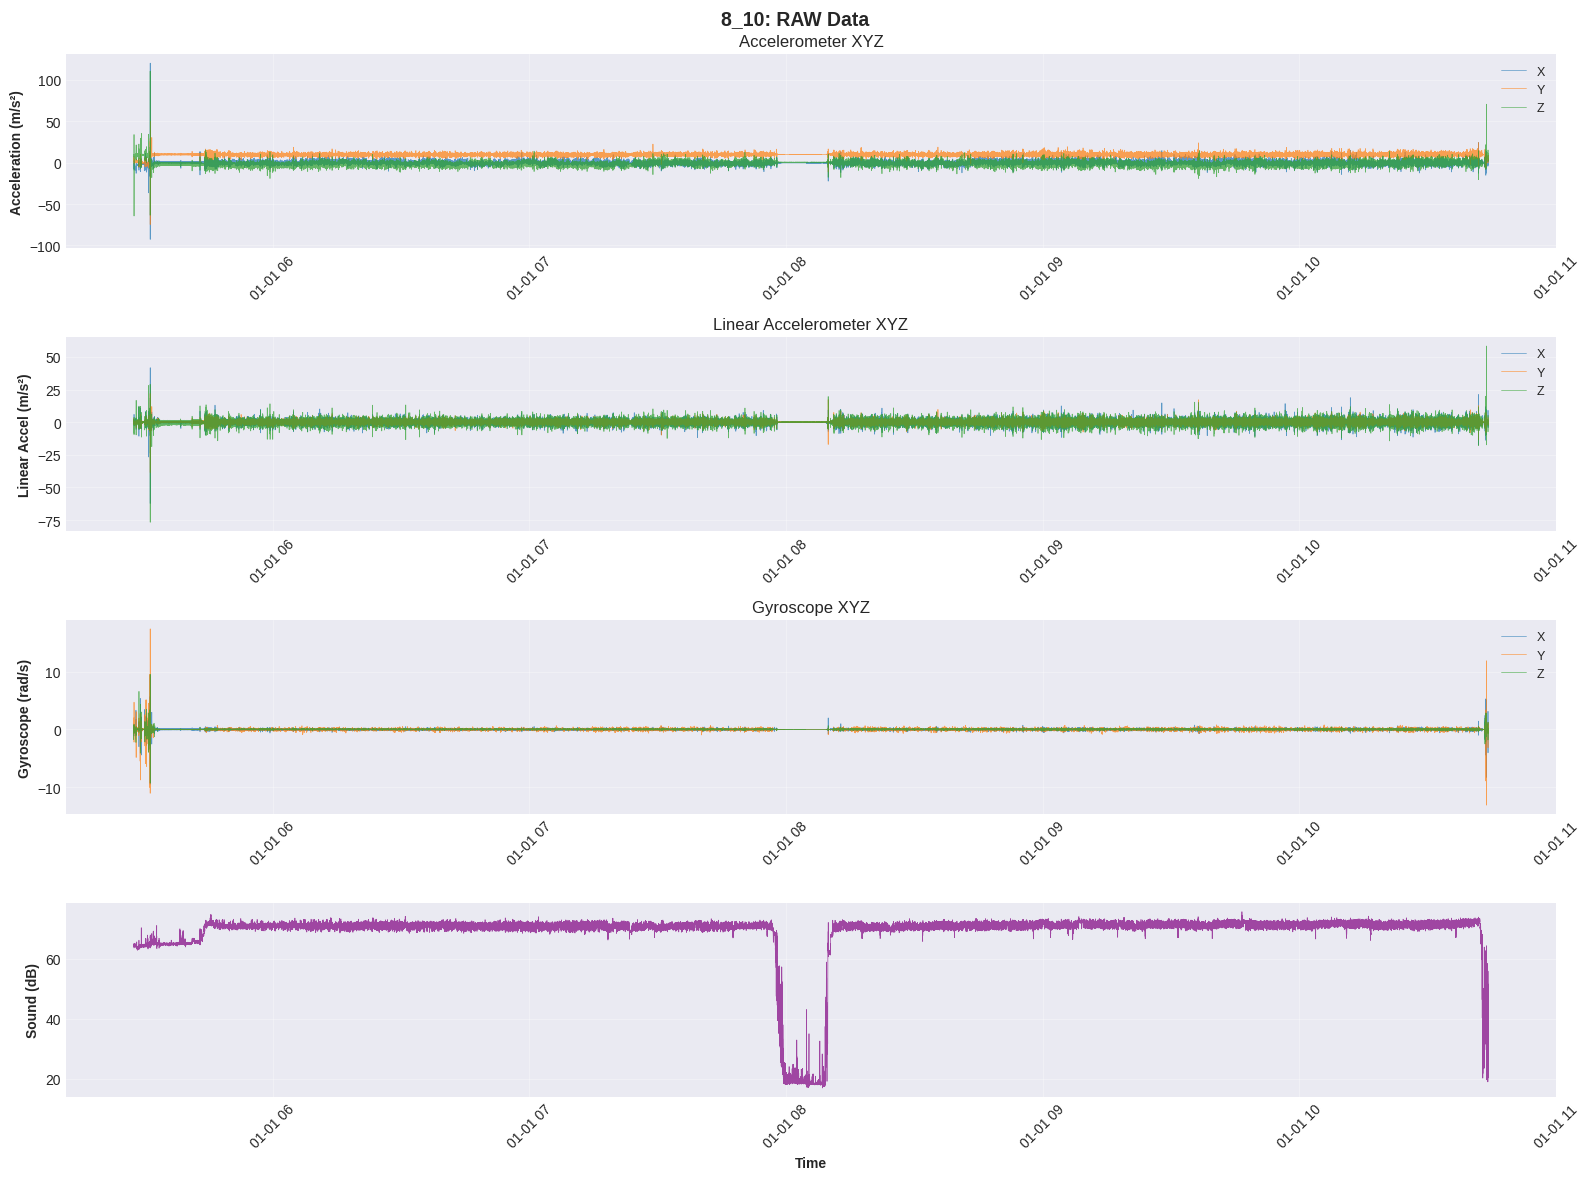

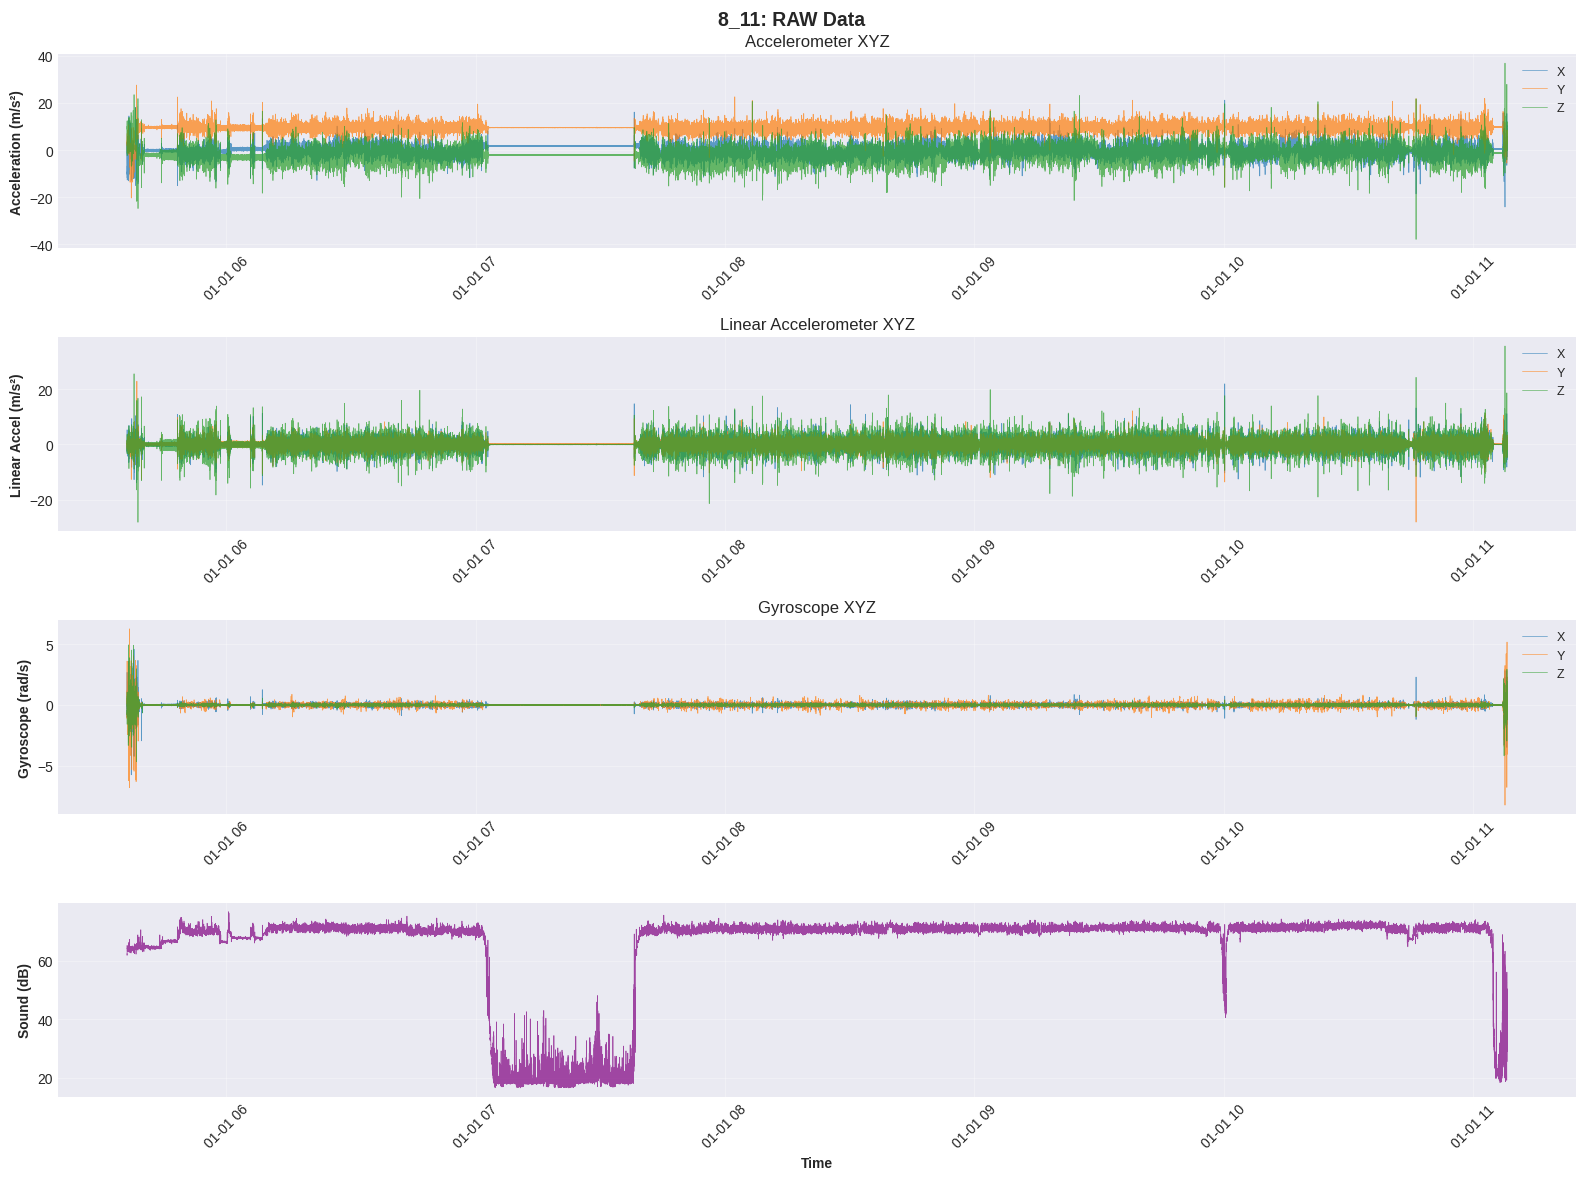

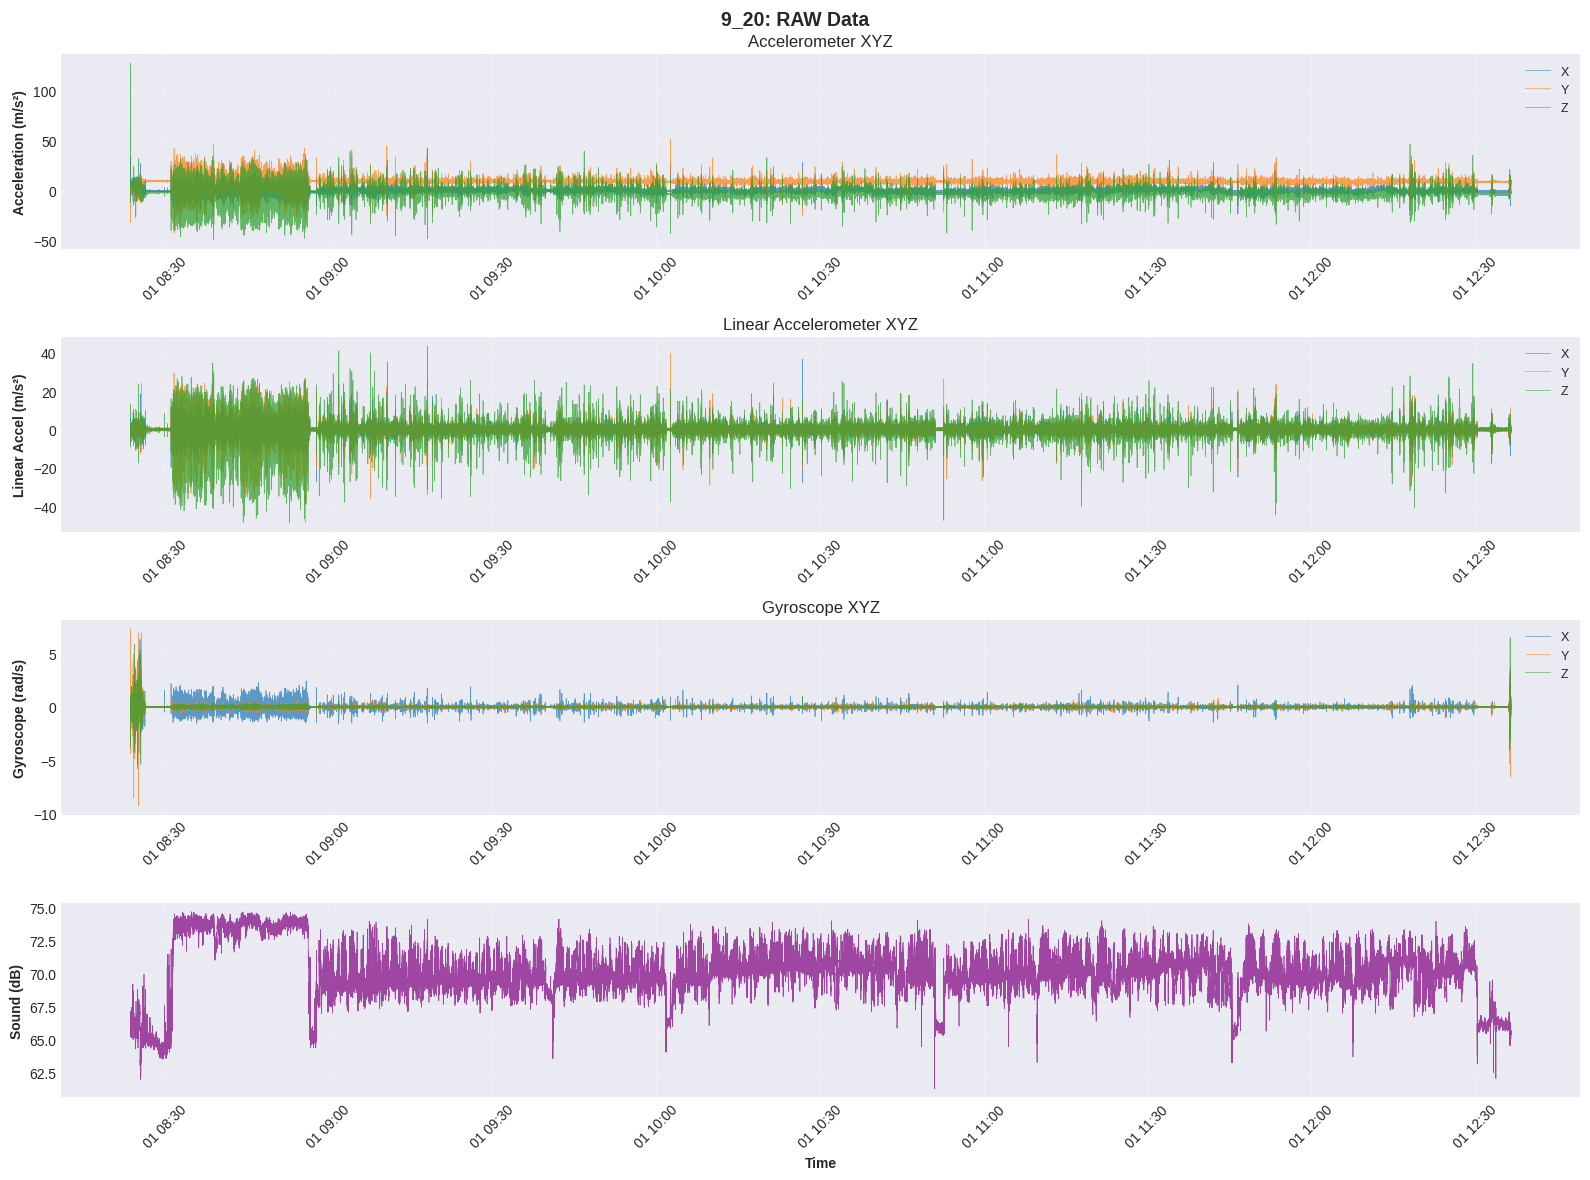

In [59]:
# Plot for 3 data_labels: '8_10', '8_11', '9_20'
data_labels = ['8_10', '8_11', '9_20']
for date_label in data_labels:
    df = raw_data[date_label]
    fig, axes = plt.subplots(4, 1, figsize=(16, 12))
    fig.suptitle(f'{date_label}: RAW Data', fontsize=14, fontweight='bold')
    # Accelerometer XYZ
    ax = axes[0]
    ax.plot(df['DateTime'], df['Accel.X'], label='X', alpha=0.7, linewidth=0.5)
    ax.plot(df['DateTime'], df['Accel.Y'], label='Y', alpha=0.7, linewidth=0.5)
    ax.plot(df['DateTime'], df['Accel.Z'], label='Z', alpha=0.7, linewidth=0.5)
    ax.set_ylabel('Acceleration (m/s²)', fontweight='bold')
    ax.legend(loc='upper right', fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.set_title('Accelerometer XYZ')
    # Linear Accelerometer XYZ
    ax = axes[1]
    ax.plot(df['DateTime'], df['L.Accel.X'], label='X', alpha=0.7, linewidth=0.5)
    ax.plot(df['DateTime'], df['L.Accel.Y'], label='Y', alpha=0.7, linewidth=0.5)
    ax.plot(df['DateTime'], df['L.Accel.Z'], label='Z', alpha=0.7, linewidth=0.5)
    ax.set_ylabel('Linear Accel (m/s²)', fontweight='bold')
    ax.legend(loc='upper right', fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.set_title('Linear Accelerometer XYZ')
    # Gyroscope XYZ
    ax = axes[2]
    ax.plot(df['DateTime'], df['Gyro.X'], label='X', alpha=0.7, linewidth=0.5)
    ax.plot(df['DateTime'], df['Gyro.Y'], label='Y', alpha=0.7, linewidth=0.5)
    ax.plot(df['DateTime'], df['Gyro.Z'], label='Z', alpha=0.7, linewidth=0.5)
    ax.set_ylabel('Gyroscope (rad/s)', fontweight='bold')
    ax.legend(loc='upper right', fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.set_title('Gyroscope XYZ')
    # Sound
    ax = axes[3]
    ax.plot(df['DateTime'], df['Sound'], color='purple', alpha=0.7, linewidth=0.5)
    ax.set_ylabel('Sound (dB)', fontweight='bold')
    ax.set_xlabel('Time', fontweight='bold')
    ax.grid(True, alpha=0.3)
    for current_ax in axes:
        current_ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

## 2. Visualize Element States (with Startup/Shutdown)

Check the `Element` of data, we can see that outliers are mostly come from label `END` to the end of data that told about the working time end (turn off the engine) and come from label `NULL/NaN` => we can remove them.

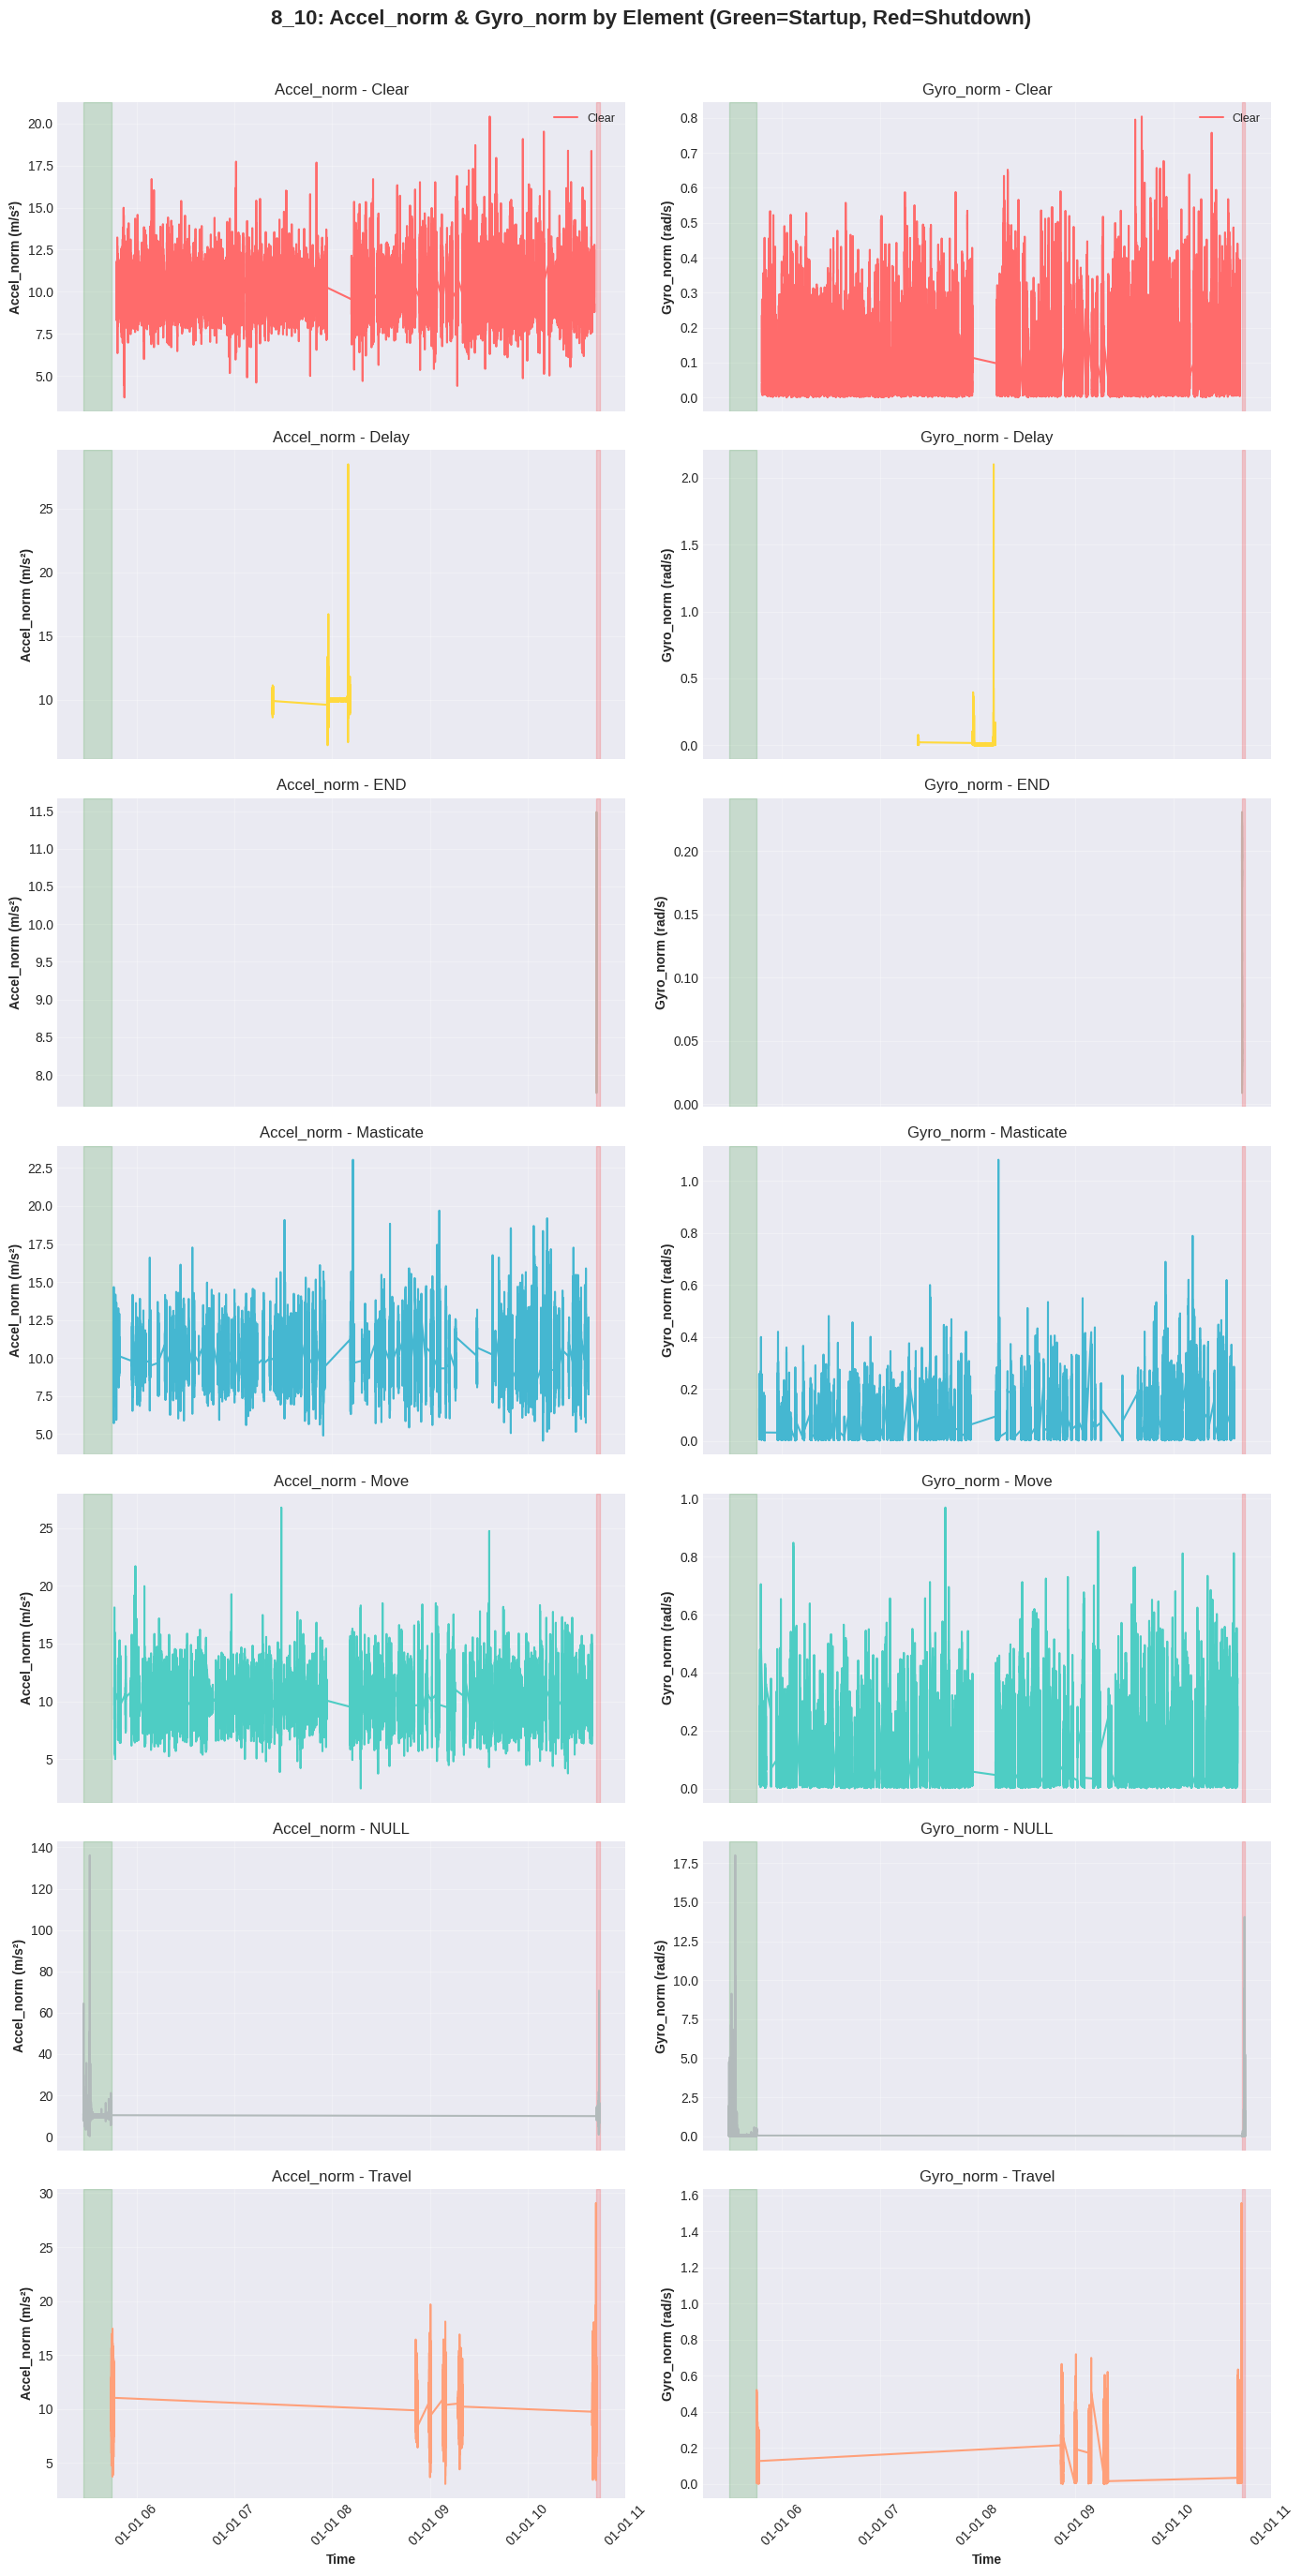

✓ 8_10: Elements=['Clear', 'Delay', 'END', 'Masticate', 'Move', 'NULL', 'Travel'], Startup=51,166, Shutdown=5,916


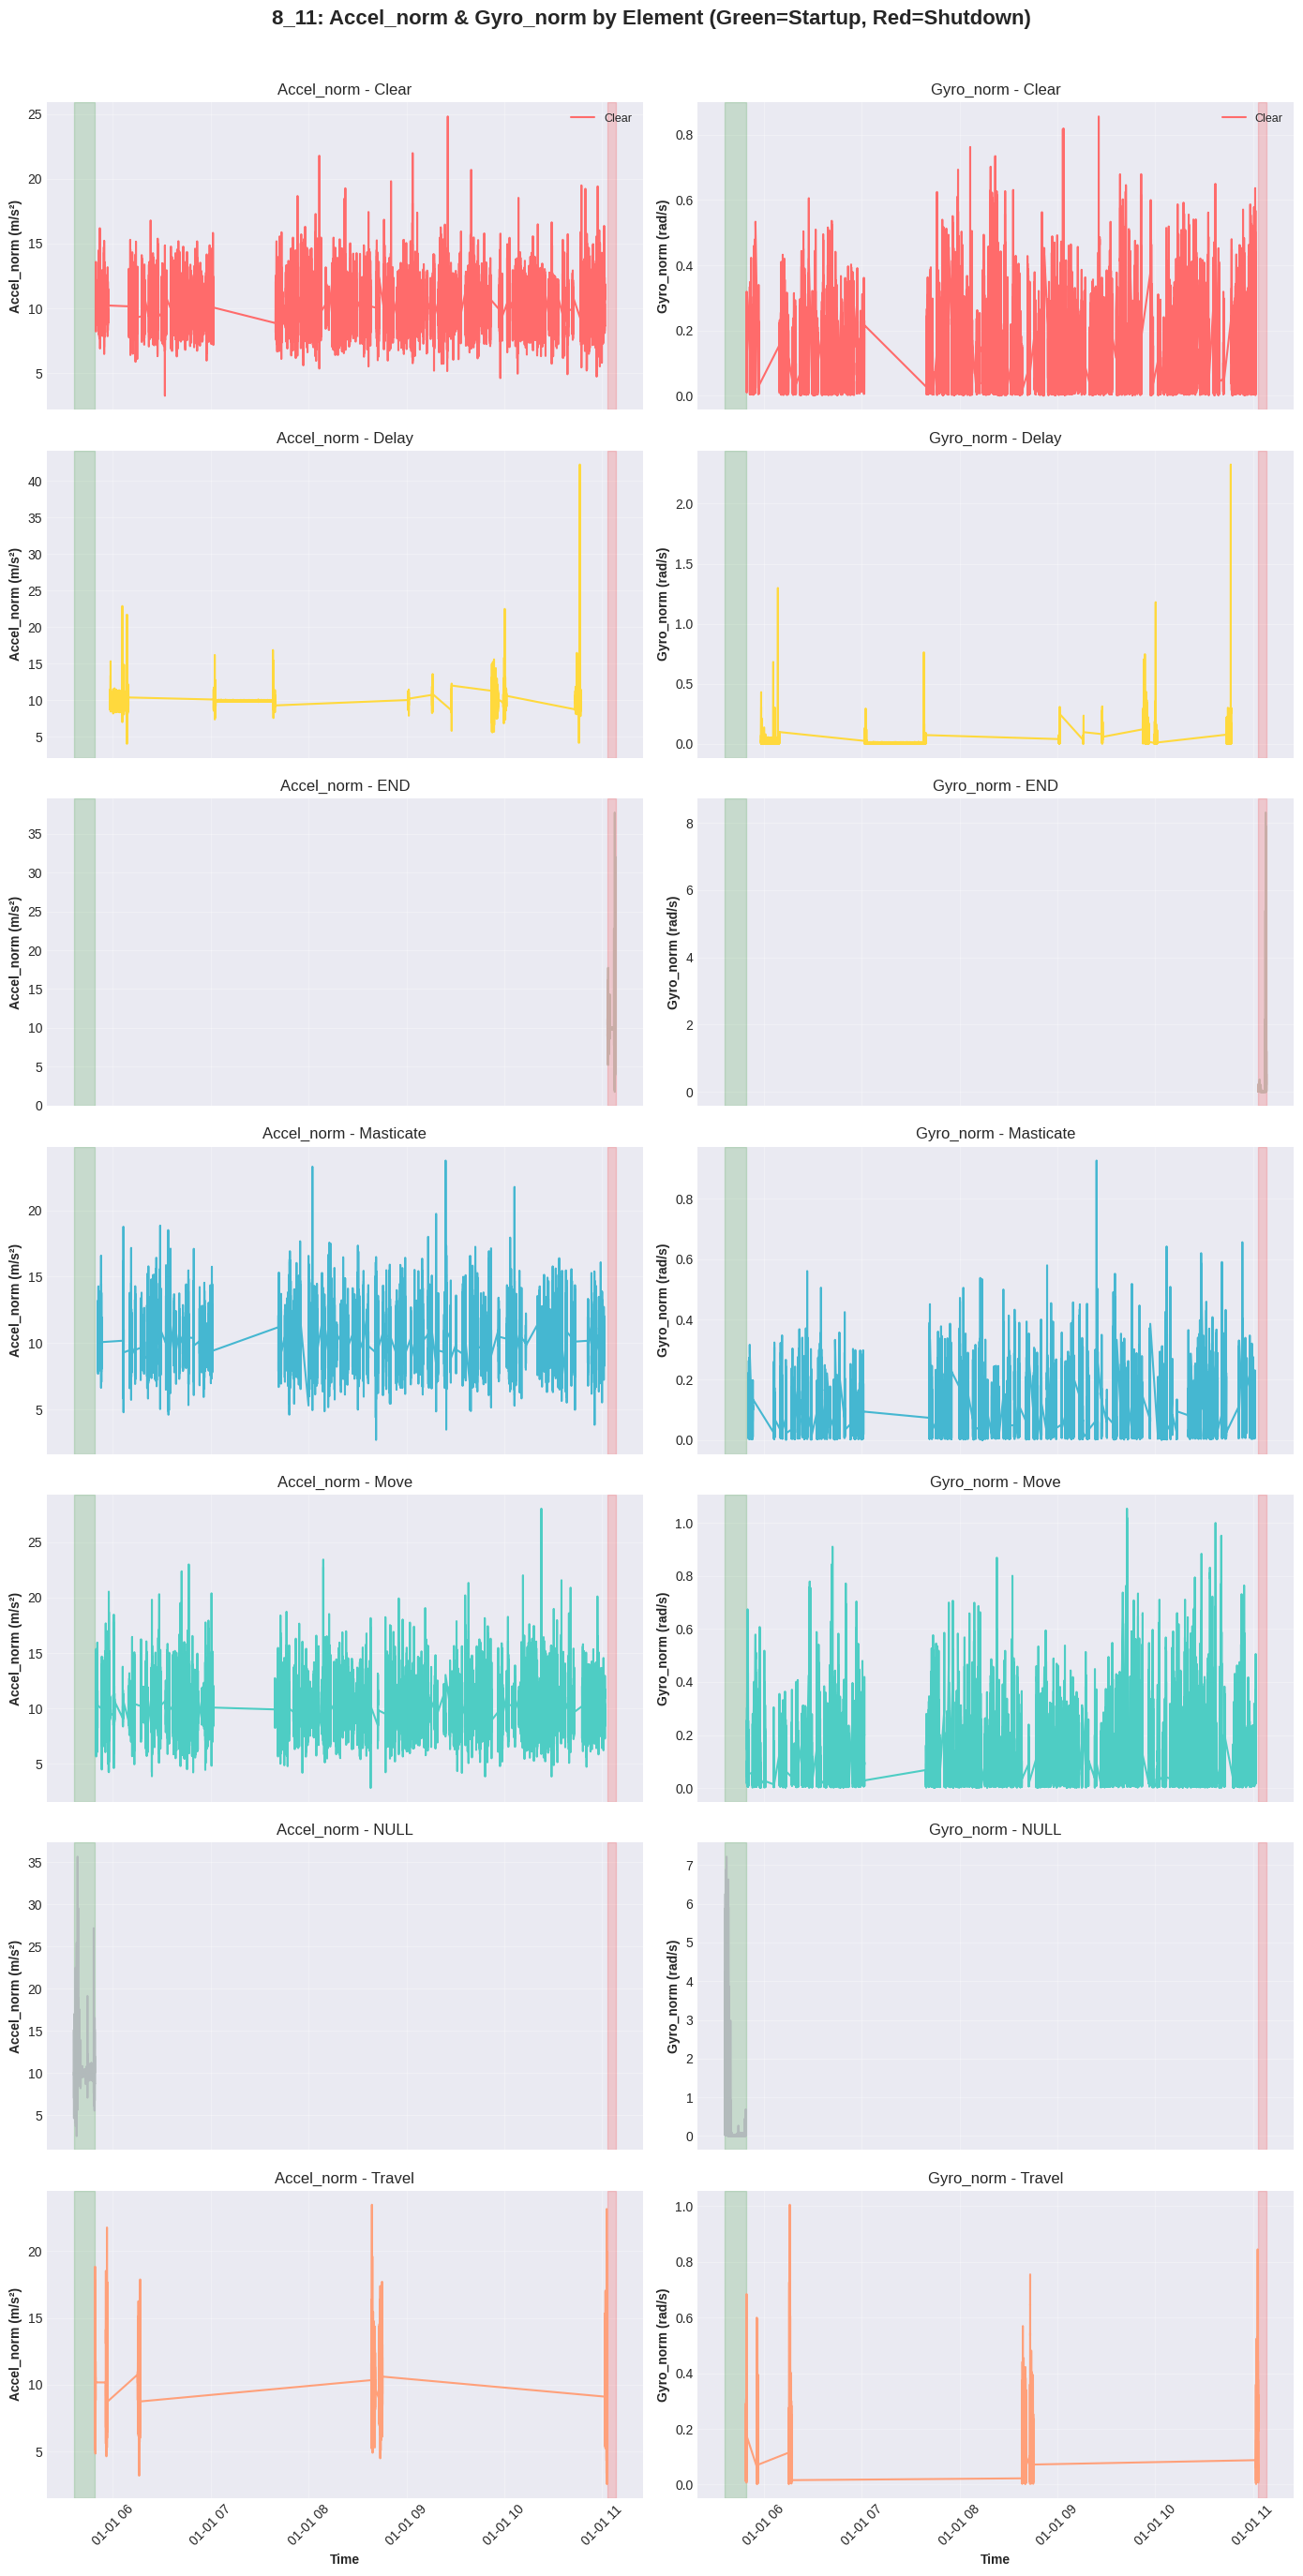

✓ 8_11: Elements=['Clear', 'Delay', 'END', 'Masticate', 'Move', 'NULL', 'Travel'], Startup=39,259, Shutdown=15,343


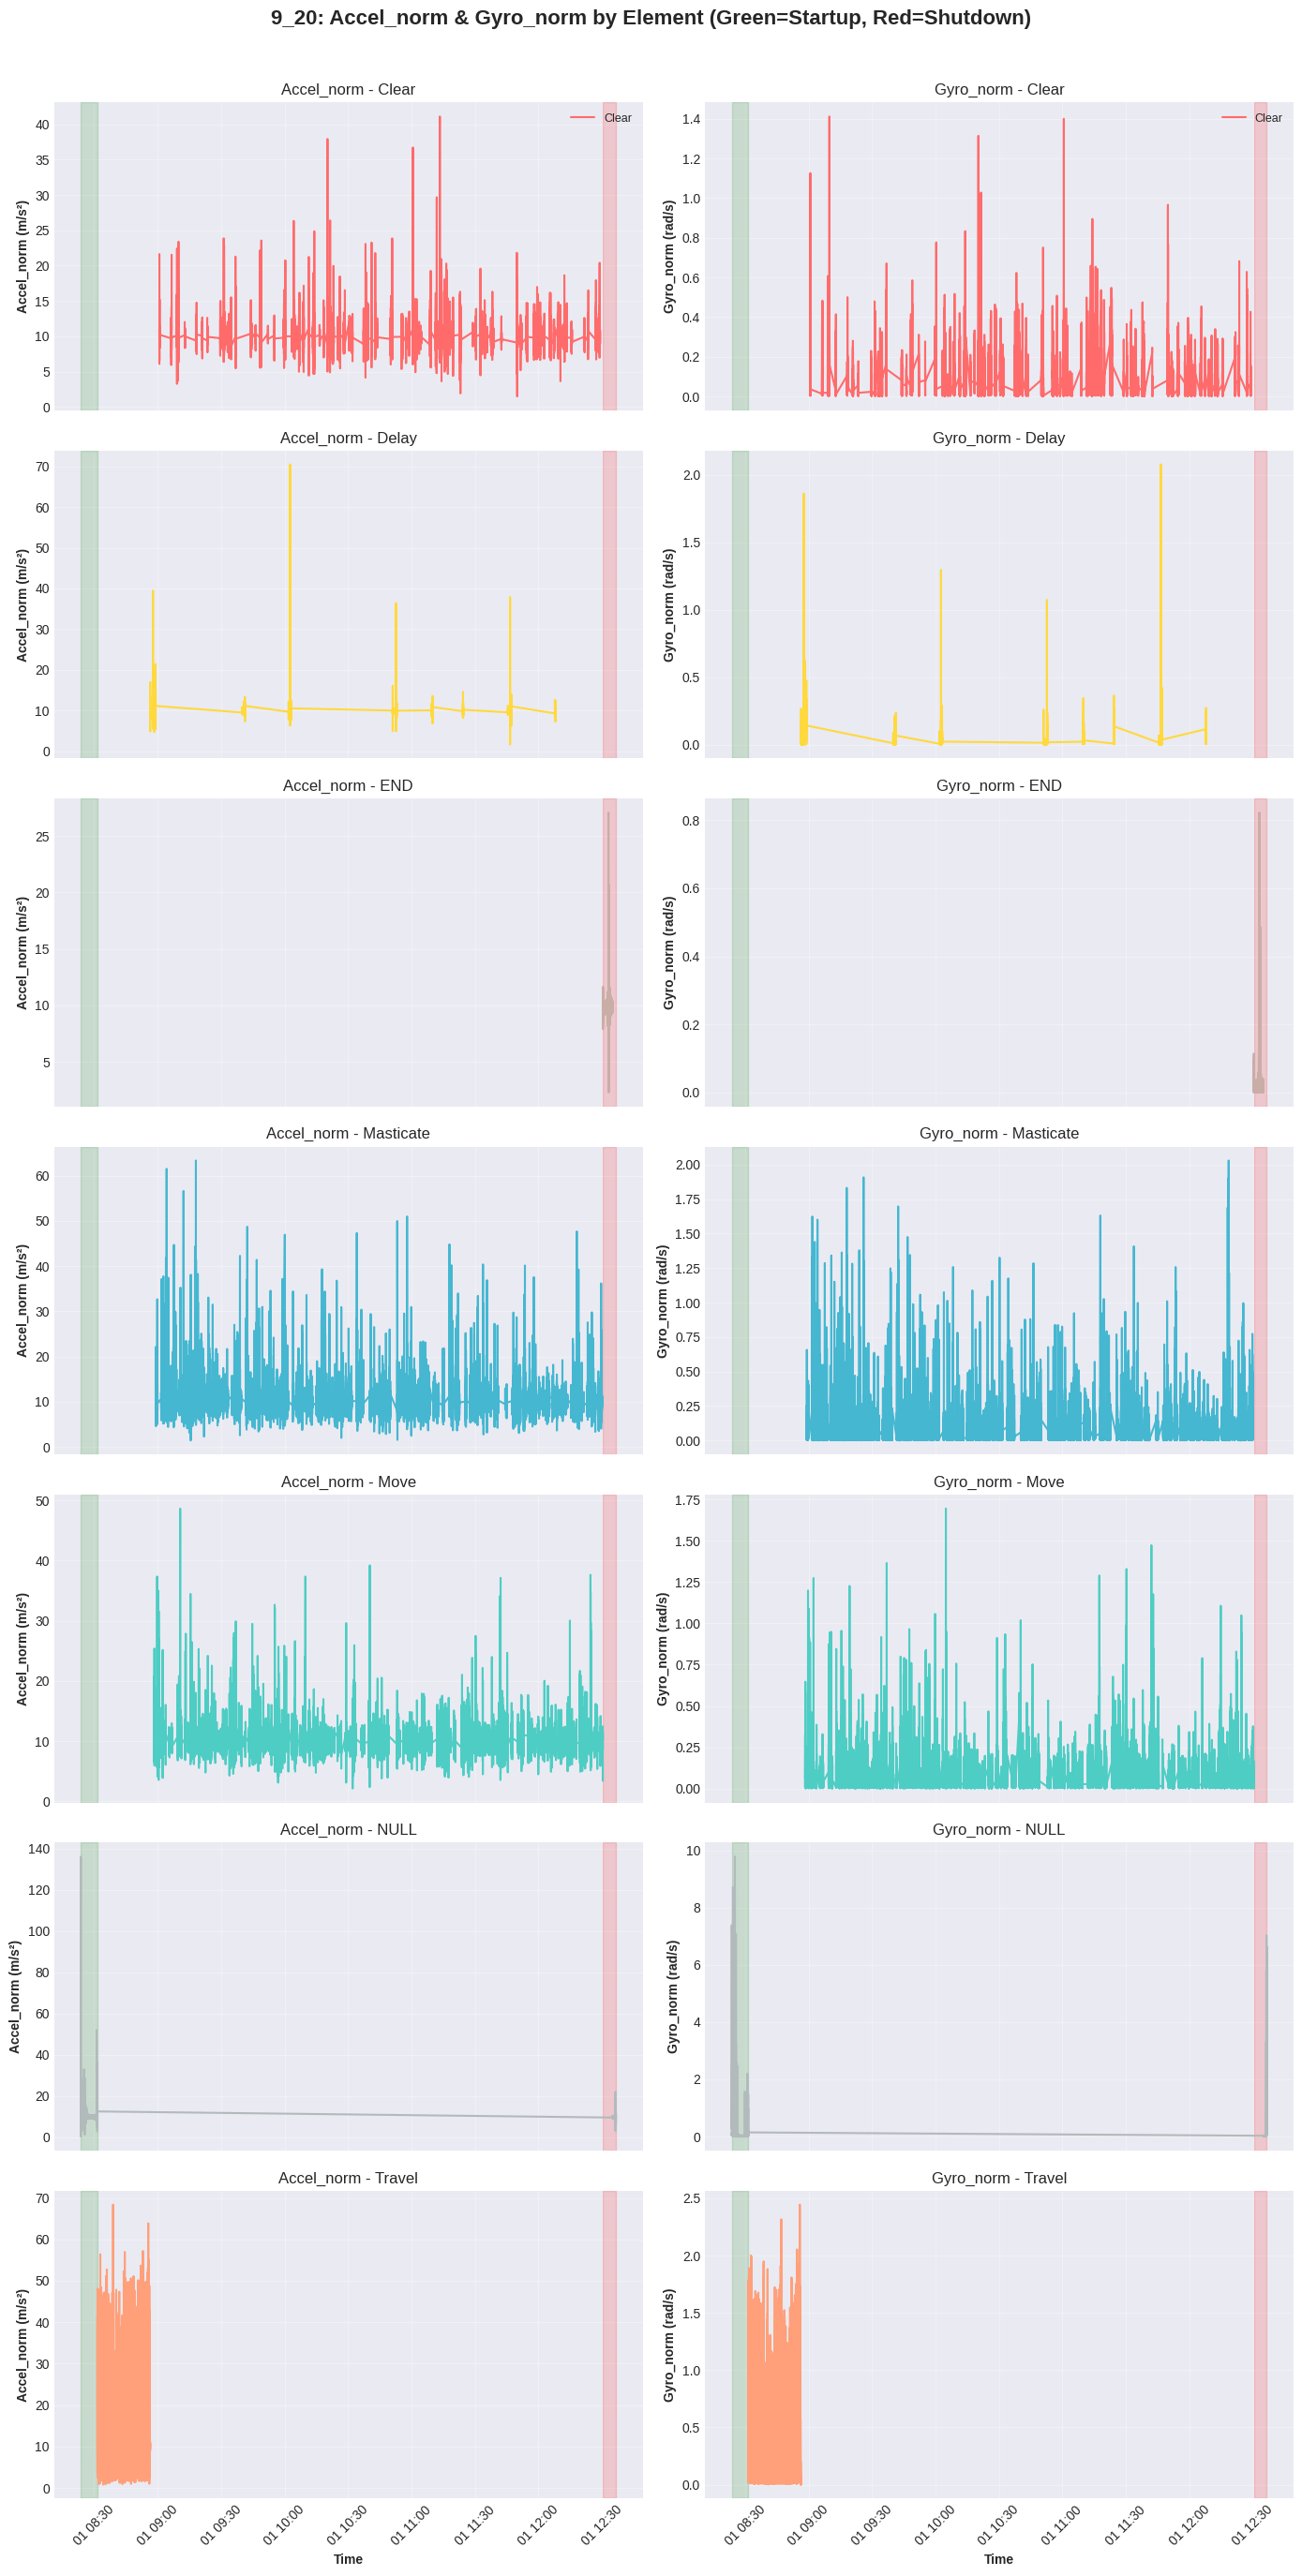

✓ 9_20: Elements=['Clear', 'Delay', 'END', 'Masticate', 'Move', 'NULL', 'Travel'], Startup=23,985, Shutdown=18,572


In [60]:
date_labels = ['8_10', '8_11', '9_20']
element_colors = {
    'Clear': '#FF6B6B', 'Move': '#4ECDC4', 'Masticate': '#45B7D1',
    'Travel': '#FFA07A', 'Delay': '#FFD93D', 'NULL': '#B2BABB', 'END': '#C9ADA7'
}

for date_label in date_labels:
    df = raw_data[date_label].copy()
    # Calculate Accel_norm and Gyro_norm if not present
    if 'Accel_norm' not in df.columns:
        df['Accel_norm'] = (df[['Accel.X', 'Accel.Y', 'Accel.Z']]**2).sum(axis=1).pow(0.5)
    if 'Gyro_norm' not in df.columns:
        df['Gyro_norm'] = (df[['Gyro.X', 'Gyro.Y', 'Gyro.Z']]**2).sum(axis=1).pow(0.5)
    
    unique_elements = sorted(df['Element_display'].unique())
    startup_indices, shutdown_start = identify_startup_shutdown(df)

    # Plot a separate Accel_norm and Gyro_norm subplot for each Element, vertically stacked
    num_elements = len(unique_elements)
    fig, axes = plt.subplots(num_elements, 2, figsize=(14, 4*num_elements), sharex='col')
    fig.suptitle(f'{date_label}: Accel_norm & Gyro_norm by Element (Green=Startup, Red=Shutdown)', fontsize=16, fontweight='bold')

    for i, element in enumerate(unique_elements):
        mask = df['Element_display'] == element
        color = element_colors.get(element, '#808080')
        # Accel_norm subplot
        ax_accel = axes[i, 0] if num_elements > 1 else axes[0]
        x_vals = df.loc[mask, 'DateTime'].values
        y_vals = df.loc[mask, 'Accel_norm'].values
        ax_accel.plot(x_vals, y_vals, color=color, label=f'{element}')
        ax_accel.set_ylabel('Accel_norm (m/s²)', fontweight='bold')
        ax_accel.grid(True, alpha=0.3)
        title = f'Accel_norm - {element}'
        ax_accel.set_title(title)
        if i == 0:
            ax_accel.legend(loc='upper right', fontsize=9)
        # Highlight startup/shutdown regions
        if startup_indices:
            startup_time_end = df.loc[startup_indices[-1], 'DateTime']
            ax_accel.axvspan(df['DateTime'].min(), startup_time_end, alpha=0.15, color='green', label='Startup(NULL)')
        if shutdown_start:
            shutdown_time = df.loc[shutdown_start, 'DateTime']
            ax_accel.axvspan(shutdown_time, df['DateTime'].max(), alpha=0.15, color='red', label='Shutdown(END)')
        # Gyro_norm subplot
        ax_gyro = axes[i, 1] if num_elements > 1 else axes[1]
        y_vals_gyro = df.loc[mask, 'Gyro_norm'].values
        ax_gyro.plot(x_vals, y_vals_gyro, color=color, label=f'{element}')
        ax_gyro.set_ylabel('Gyro_norm (rad/s)', fontweight='bold')
        ax_gyro.grid(True, alpha=0.3)
        title_gyro = f'Gyro_norm - {element}'
        ax_gyro.set_title(title_gyro)
        if i == 0:
            ax_gyro.legend(loc='upper right', fontsize=9)
        # Highlight startup/shutdown regions
        if startup_indices:
            ax_gyro.axvspan(df['DateTime'].min(), startup_time_end, alpha=0.15, color='green', label='Startup(NULL)')
        if shutdown_start:
            ax_gyro.axvspan(shutdown_time, df['DateTime'].max(), alpha=0.15, color='red', label='Shutdown(END)')

    # Set xlabel for the bottom plots
    for j in range(2):
        if num_elements == 1:
            axes[j].set_xlabel('Time', fontweight='bold')
            axes[j].tick_params(axis='x', rotation=45)
        else:
            axes[-1, j].set_xlabel('Time', fontweight='bold')
            axes[-1, j].tick_params(axis='x', rotation=45)
            for i in range(num_elements):
                axes[i, j].tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()
    print(f'✓ {date_label}: Elements={unique_elements}, Startup={len(startup_indices):,}, Shutdown={len(df)-shutdown_start if shutdown_start else 0:,}')

## 3. Clean Data (Remove Startup/Shutdown) & Save

In [ ]:
cleaned_data = {}
date_mapping = {'8_10': '10082022', '8_11': '11082022', '9_20': '20092022'}
for date_label, filename in raw_files.items():
    df = raw_data[date_label]
    df_clean, startup_idx, shutdown_idx = clean_data(df)
    cleaned_data[date_label] = df_clean
    output_filename = f"cleaned_{date_mapping[date_label]}_data.csv"
    output_path = processed_data_dir / output_filename
    df_clean.to_csv(output_path, index=False)
    print(f'✓ {date_label}: {len(df):,} → {len(df_clean):,} (saved: {output_filename})')

✓ 8_10: 950,232 → 893,150 (saved: 10082022_data_cleaned.csv)
✓ 8_11: 997,302 → 942,700 (saved: 11082022_data_cleaned.csv)
✓ 9_20: 759,257 → 716,700 (saved: 20092022_data_cleaned.csv)


## 4. Visualize Cleaned Data

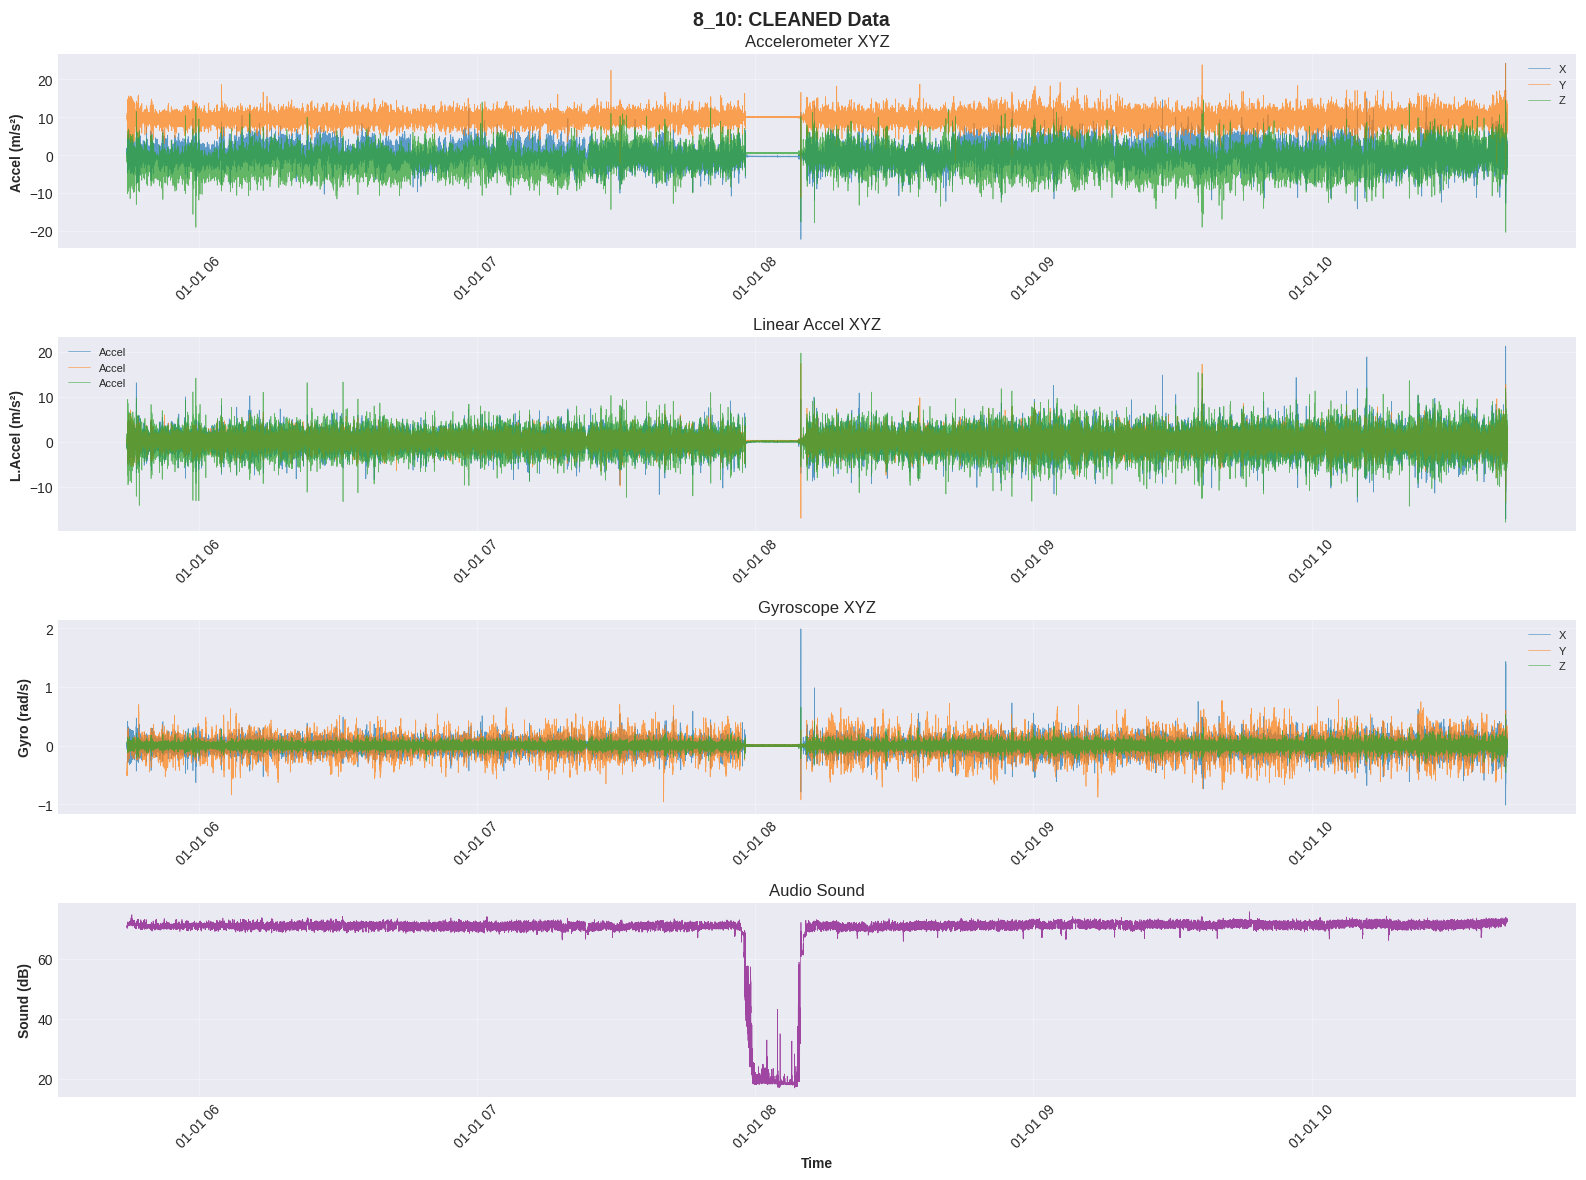

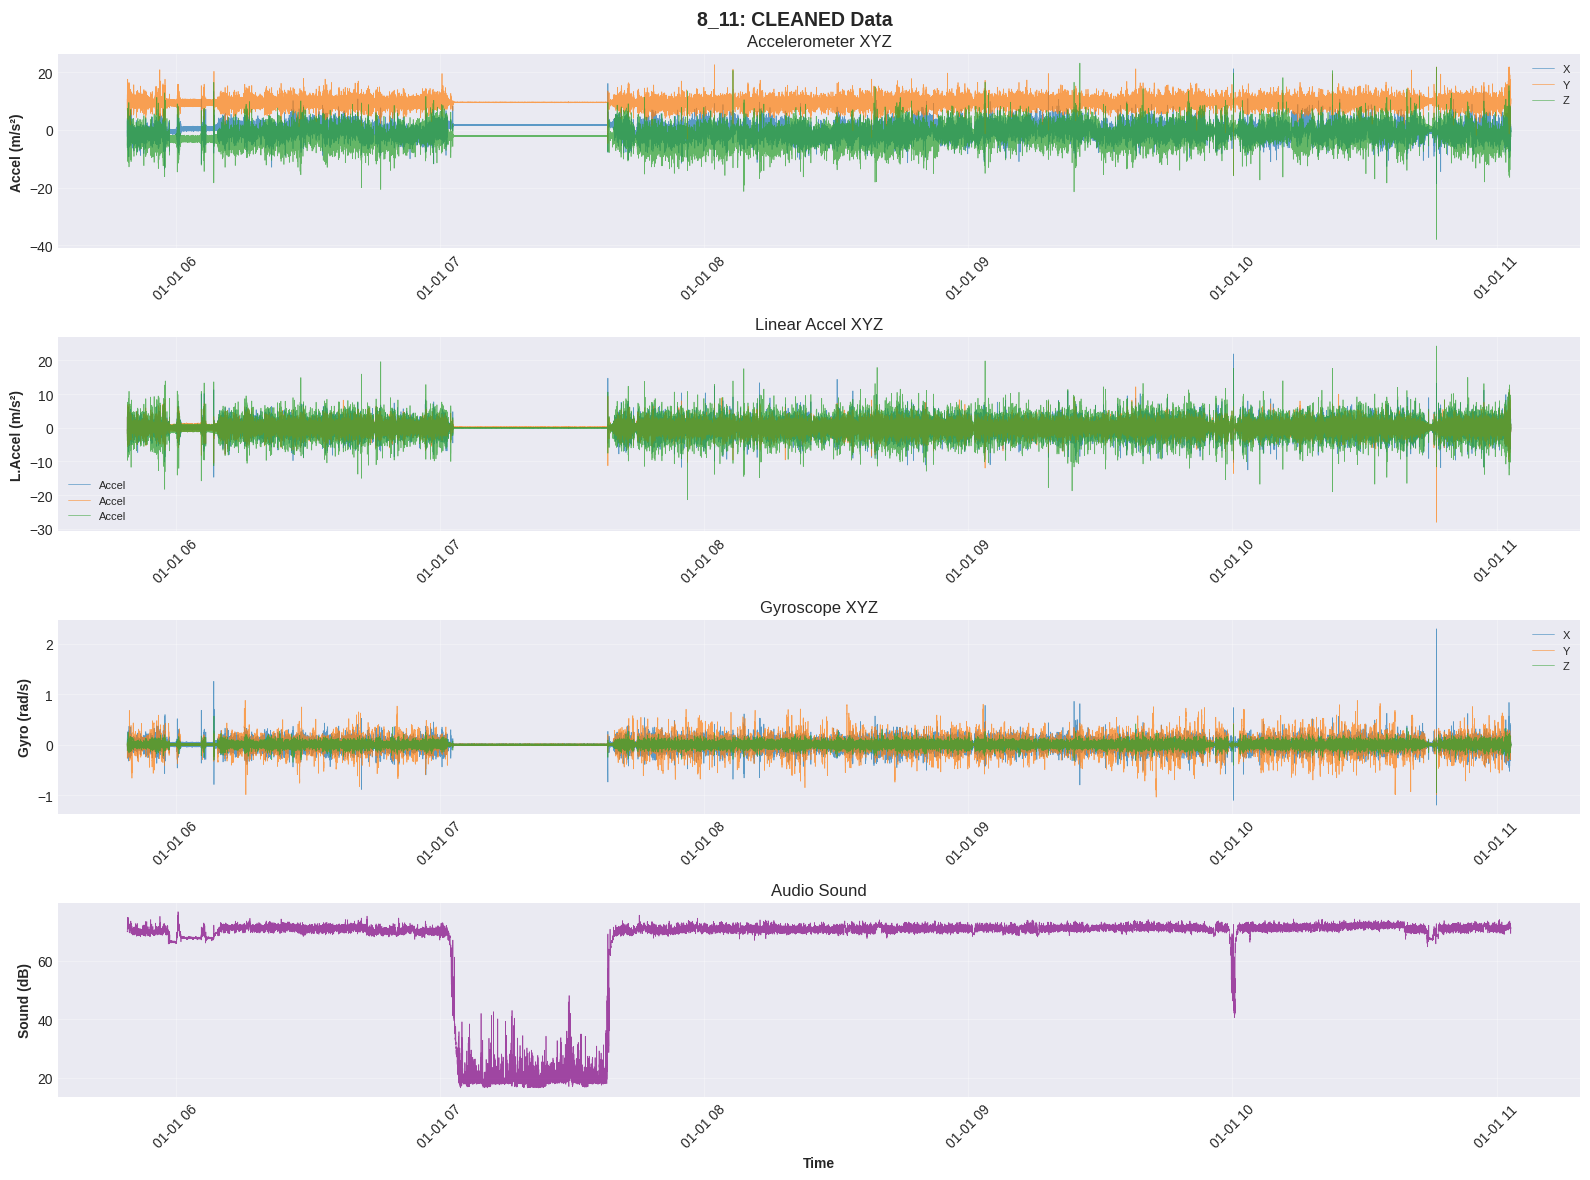

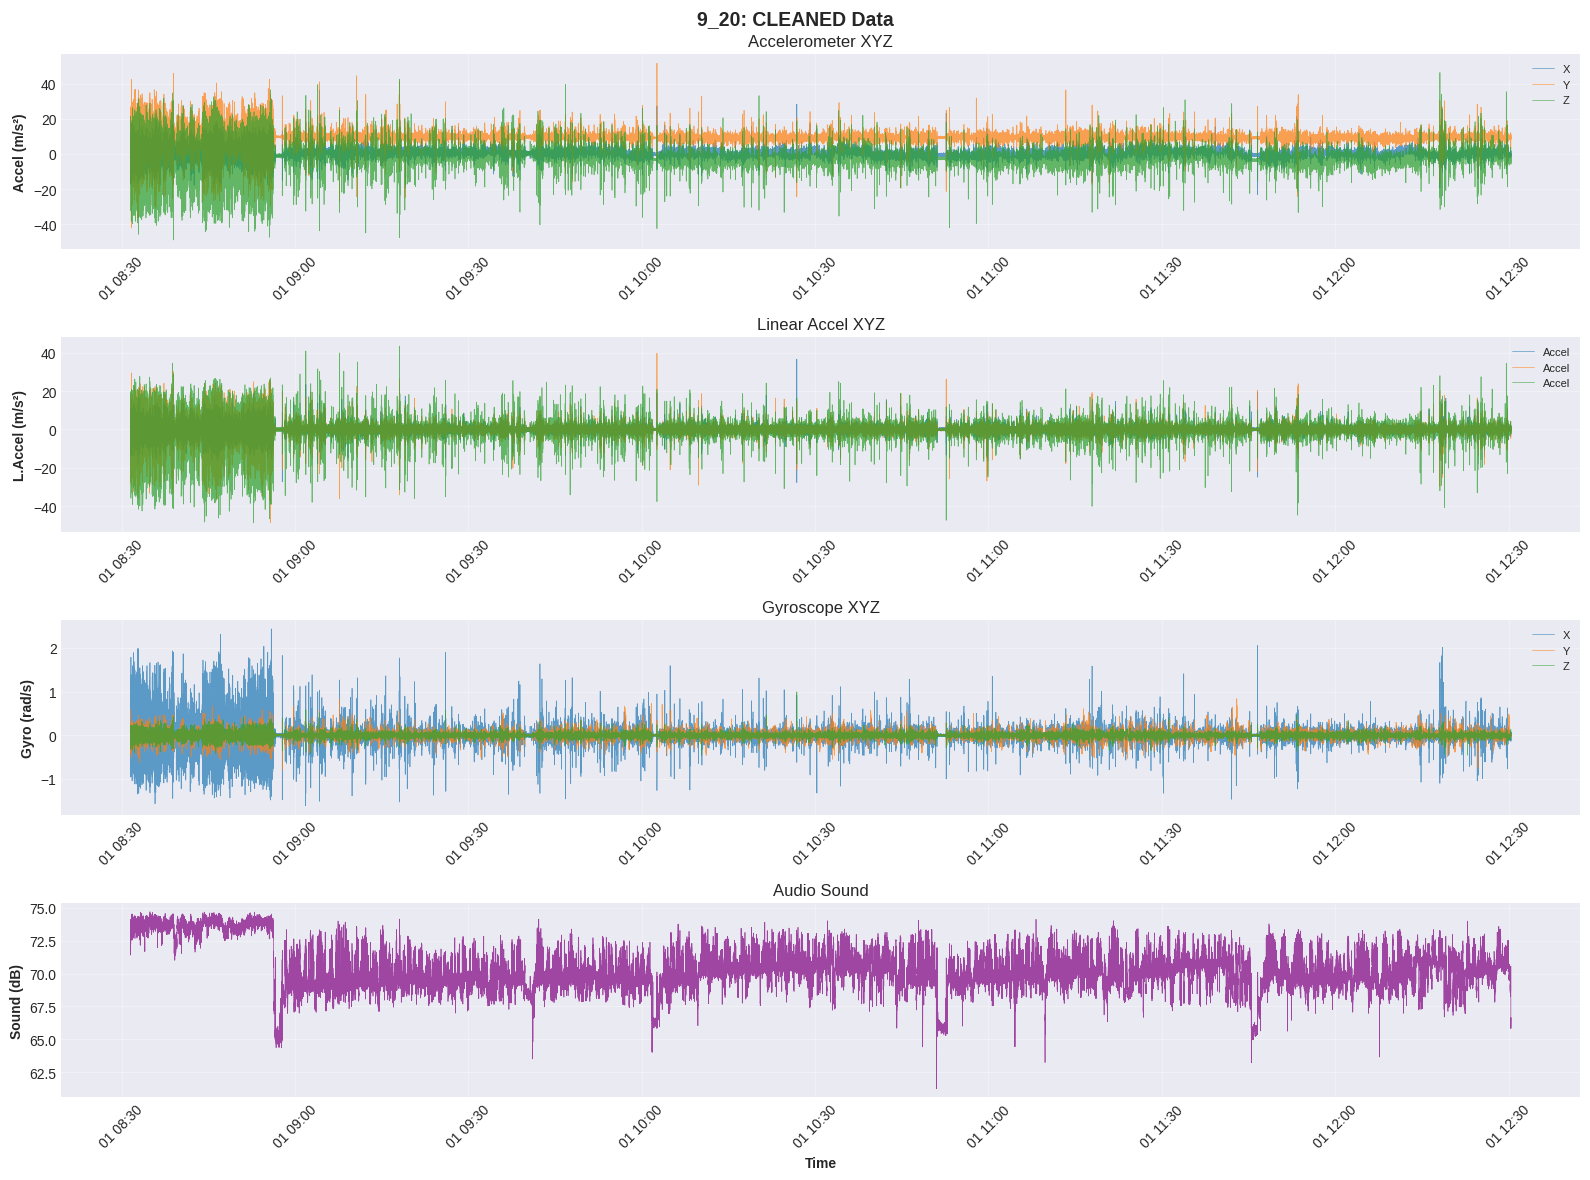

In [62]:
data_labels = ['8_10', '8_11', '9_20']
for date_label in data_labels:
    df_clean = cleaned_data[date_label]
    fig, axes = plt.subplots(4, 1, figsize=(16, 12))
    fig.suptitle(f'{date_label}: CLEANED Data', fontsize=14, fontweight='bold')
    for idx, (col, title, ylabel) in enumerate([
        (['Accel.X', 'Accel.Y', 'Accel.Z'], 'Accelerometer XYZ', 'Accel (m/s²)'),
        (['L.Accel.X', 'L.Accel.Y', 'L.Accel.Z'], 'Linear Accel XYZ', 'L.Accel (m/s²)'),
        (['Gyro.X', 'Gyro.Y', 'Gyro.Z'], 'Gyroscope XYZ', 'Gyro (rad/s)'),
    ]):
        ax = axes[idx]
        for c in col:
            ax.plot(df_clean['DateTime'], df_clean[c], label=c.split('.')[1], alpha=0.7, linewidth=0.5)
        ax.set_ylabel(ylabel, fontweight='bold')
        ax.legend(fontsize=8)
        ax.grid(True, alpha=0.3)
        ax.set_title(title)
    ax = axes[3]
    ax.plot(df_clean['DateTime'], df_clean['Sound'], color='purple', alpha=0.7, linewidth=0.5)
    ax.set_ylabel('Sound (dB)', fontweight='bold')
    ax.set_xlabel('Time', fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.set_title('Audio Sound')
    for ax in axes: ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

## 5. Calculate Activity Score

In [63]:
activity_scores = {}
thresholds = {}
for date_label in raw_files.keys():
    df_clean = cleaned_data[date_label]
    activity_score, _, _ = calculate_activity_score(df_clean)
    activity_scores[date_label] = activity_score
    valid_scores = activity_score[~np.isnan(activity_score)]
    on_th = np.percentile(valid_scores, 75)
    off_th = np.percentile(valid_scores, 60)
    thresholds[date_label] = {'on': on_th, 'off': off_th}
    print(f'✓ {date_label}: Range {np.nanmin(activity_score):.3f}-{np.nanmax(activity_score):.3f}, ON={on_th:.3f}, OFF={off_th:.3f}')

✓ 8_10: Range 0.003-46.351, ON=1.878, OFF=1.381
✓ 8_11: Range 0.001-67.534, ON=1.949, OFF=1.398
✓ 9_20: Range 0.002-101.962, ON=2.010, OFF=1.336


## 6. Convert Element to Active/Idle & Calculate Loss Metrics

In [64]:
predictions = {}
true_labels_dict = {}
metrics = {}
print('='*140)
print('CLASSIFICATION RESULTS')
print('='*140)
for date_label in raw_files.keys():
    df_clean = cleaned_data[date_label]
    activity_score = activity_scores[date_label]
    predicted, _, _ = classify_active_idle(activity_score, on_pct=75, off_pct=60)
    predictions[date_label] = predicted
    element_clean = df_clean['Element_display']
    true_label = create_true_labels(element_clean)
    true_labels_dict[date_label] = true_label
    print(f'\n{date_label}:')
    print(f'  PREDICTED: Active={np.sum(predicted==1):,}, Idle={np.sum(predicted==0):,}')
    print(f'  TRUE:      Active={np.sum(true_label==1):,}, Idle={np.sum(true_label==0):,}')
    eval_mask = element_clean != 'NULL'
    pred_eval = predicted[eval_mask]
    true_eval = true_label[eval_mask]
    acc = accuracy_score(true_eval, pred_eval)
    prec = precision_score(true_eval, pred_eval, zero_division=0)
    rec = recall_score(true_eval, pred_eval, zero_division=0)
    f1 = f1_score(true_eval, pred_eval, zero_division=0)
    cm = confusion_matrix(true_eval, pred_eval)
    metrics[date_label] = {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'cm': cm}
    print(f'  Accuracy: {acc*100:.2f}%, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}')
    print(f'  CM: TN={cm[0,0]:,} FP={cm[0,1]:,} | FN={cm[1,0]:,} TP={cm[1,1]:,}')

CLASSIFICATION RESULTS

8_10:
  PREDICTED: Active=857,849, Idle=35,301
  TRUE:      Active=849,400, Idle=43,750
  Accuracy: 99.05%, Precision: 0.9902, Recall: 1.0000, F1: 0.9951
  CM: TN=35,301 FP=8,449 | FN=0 TP=849,400

8_11:
  PREDICTED: Active=836,071, Idle=106,629
  TRUE:      Active=769,650, Idle=173,050
  Accuracy: 92.95%, Precision: 0.9206, Recall: 1.0000, F1: 0.9586
  CM: TN=106,629 FP=66,421 | FN=0 TP=769,650

9_20:
  PREDICTED: Active=711,051, Idle=5,649
  TRUE:      Active=687,950, Idle=28,750
  Accuracy: 96.78%, Precision: 0.9675, Recall: 1.0000, F1: 0.9835
  CM: TN=5,649 FP=23,101 | FN=0 TP=687,950


## 7. Visualize Active/Idle after converted

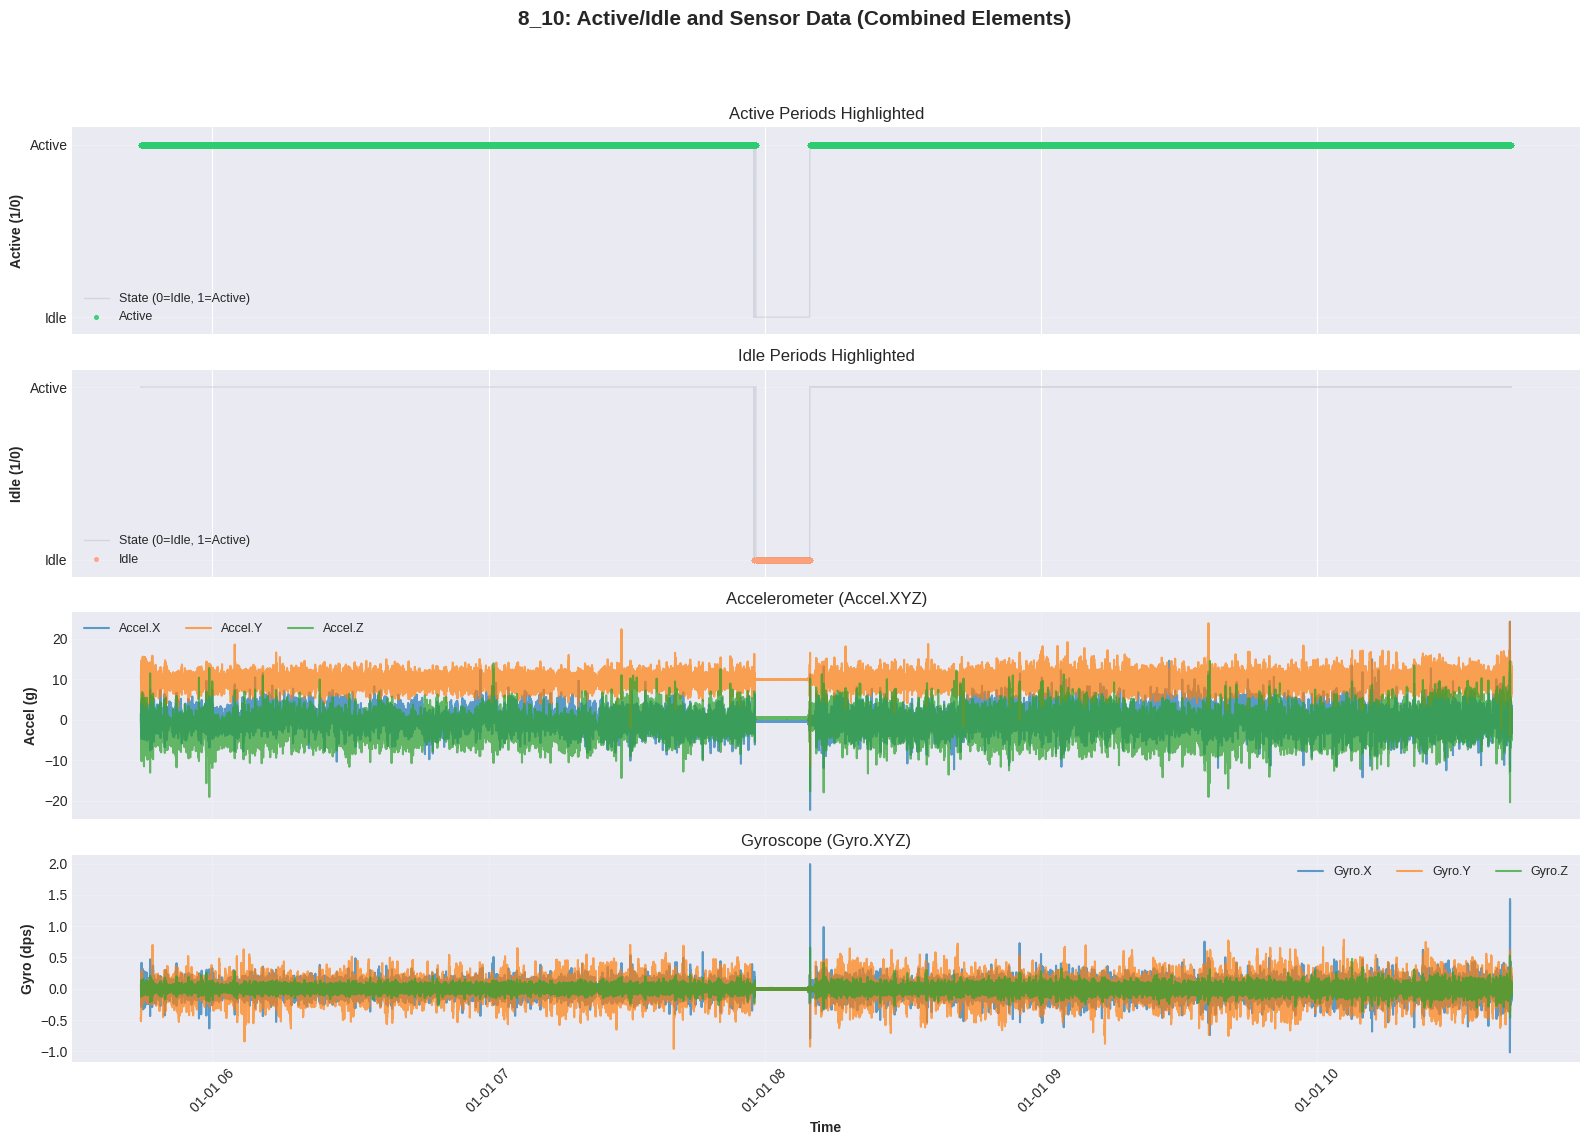

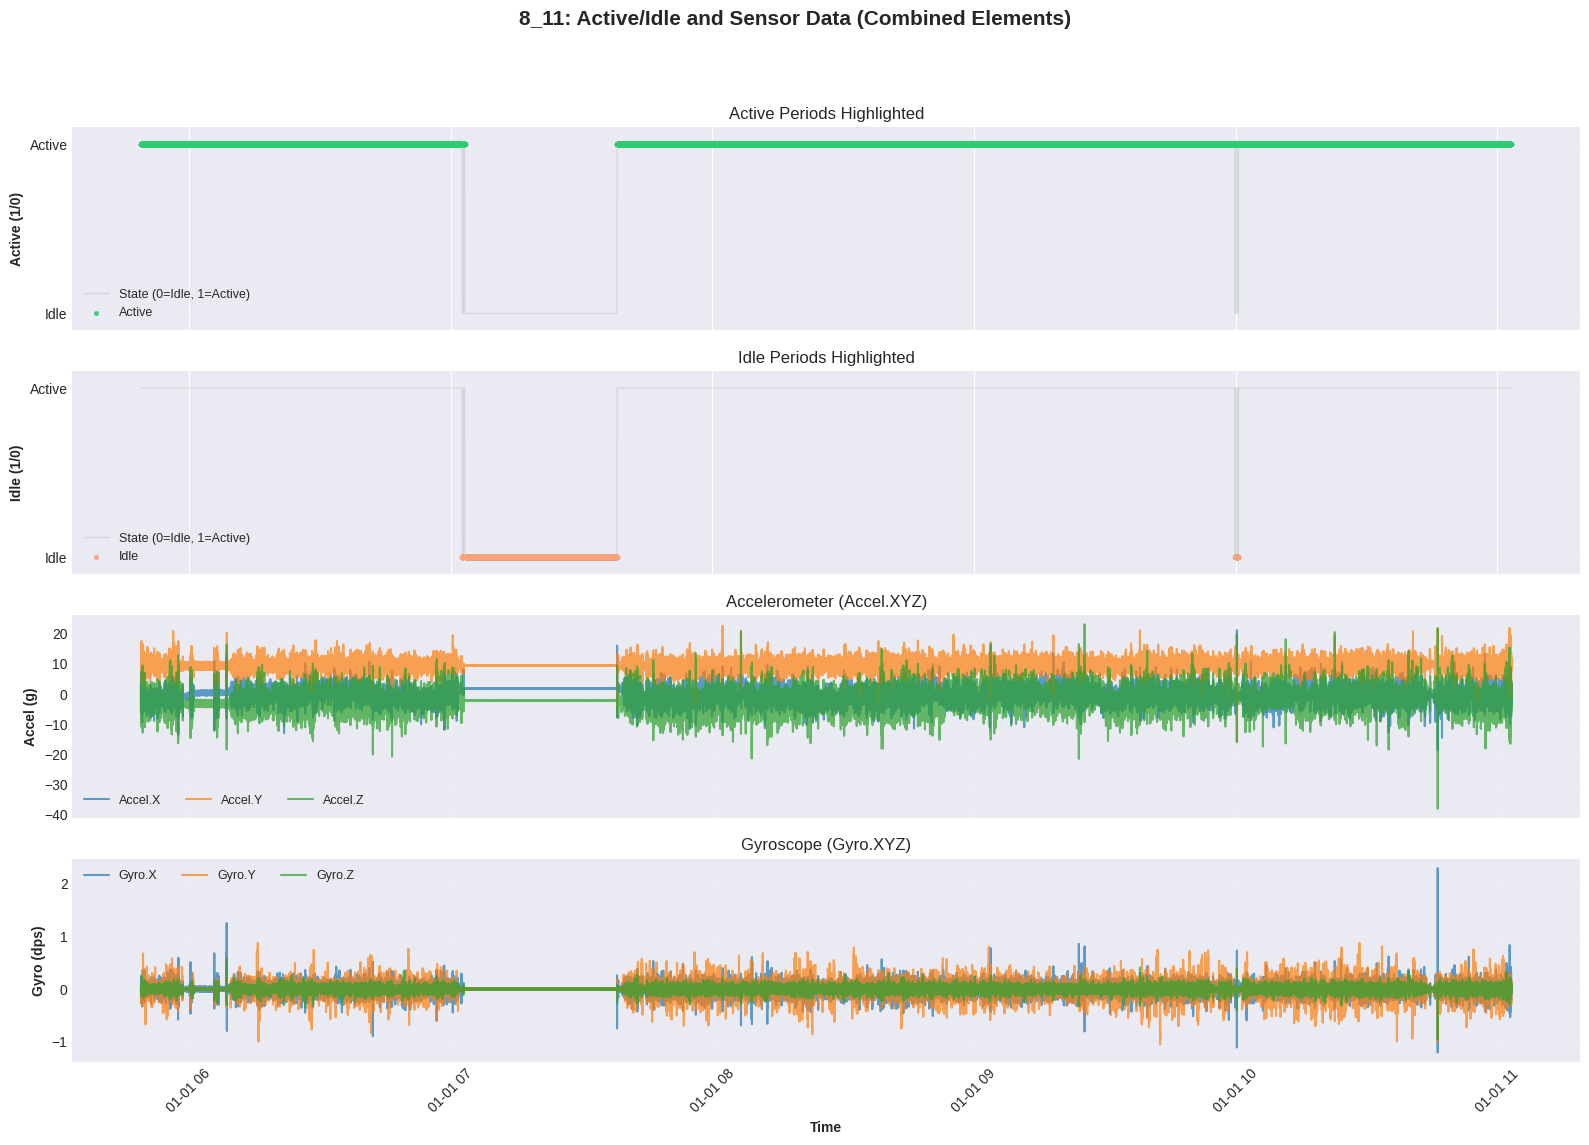

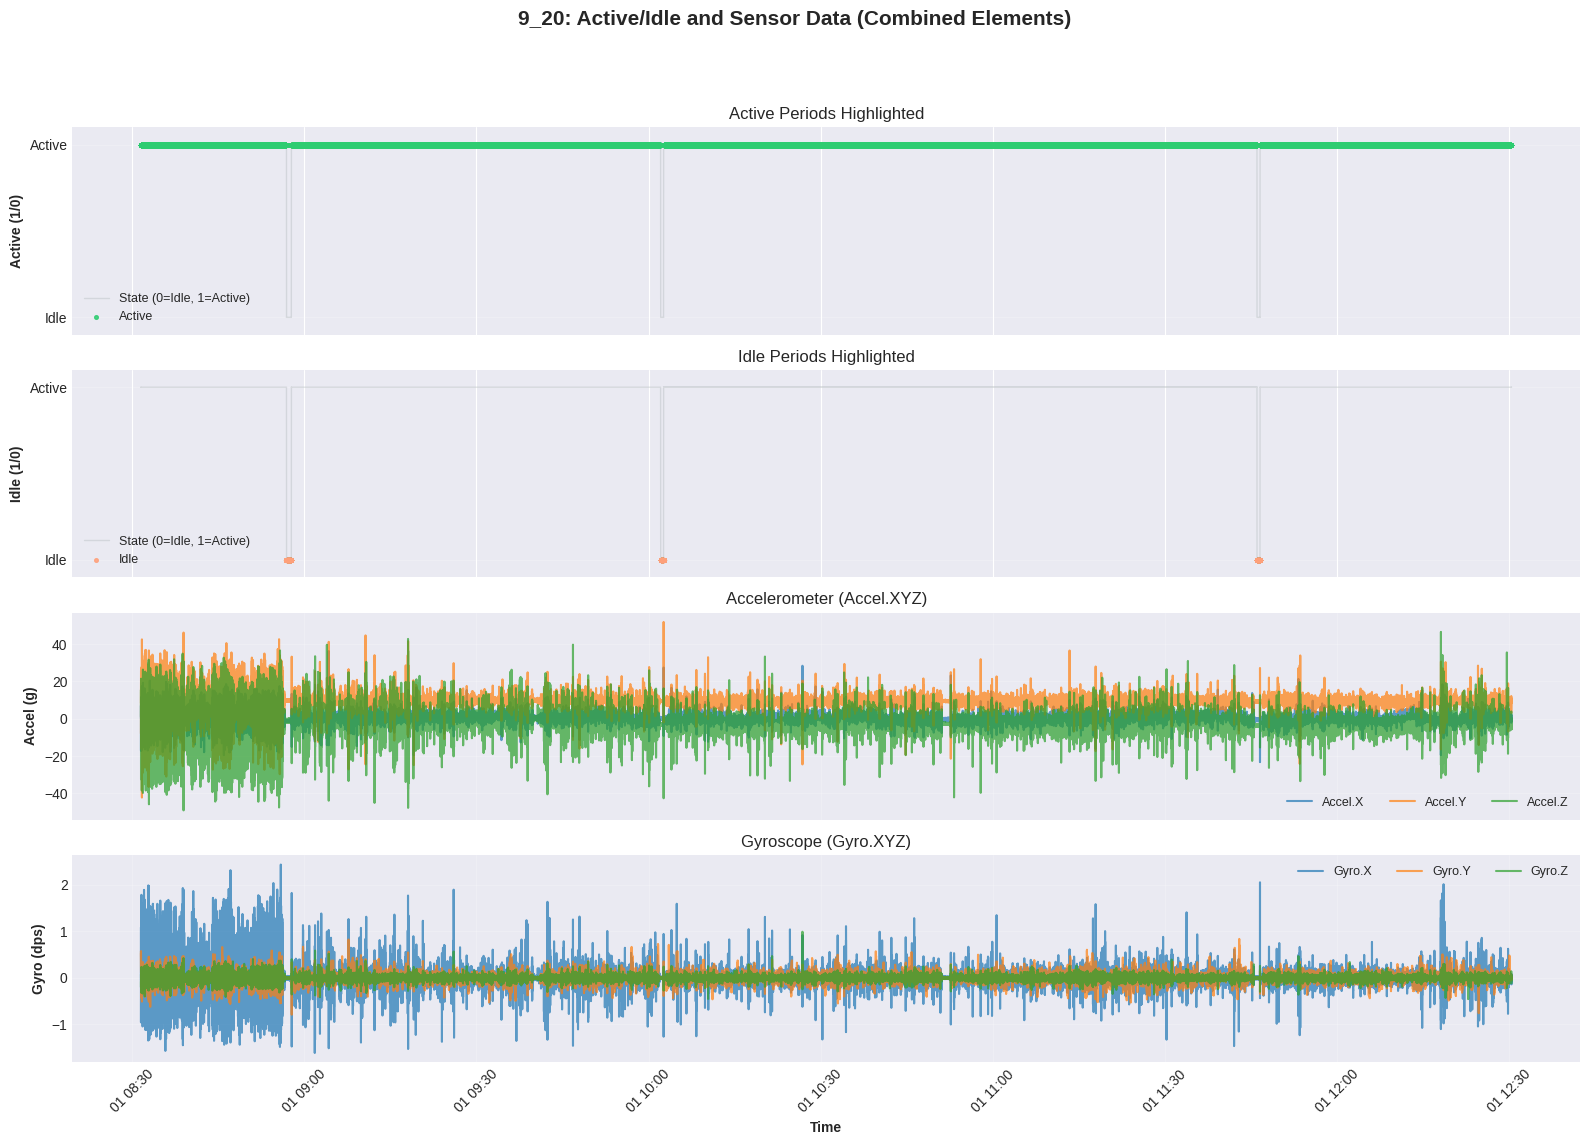

In [ ]:
# Plot time series after conversion to Active(1) / Idle(0), split into 2 plots: one for Active, one for Idle.
# Travel, Move, Clear, Masticate all combined in a single plot per type.
# Now add Accel.X, Accel.Y, Accel.Z and Gyro.X, Gyro.Y, Gyro.Z as panels below.
for date_label in raw_files.keys():
    df_clean = cleaned_data[date_label]
    predicted = predictions[date_label]
    element_clean = df_clean['Element_display']
    valid_mask = element_clean != 'NULL'
    valid_pred = predicted[valid_mask]
    valid_time = df_clean['DateTime'][valid_mask]

    # Accel.XYZ and Gyro.XYZ: valid only where element_clean != 'NULL'
    accel_x = df_clean['Accel.X'][valid_mask]
    accel_y = df_clean['Accel.Y'][valid_mask]
    accel_z = df_clean['Accel.Z'][valid_mask]
    gyro_x = df_clean['Gyro.X'][valid_mask] if 'Gyro.X' in df_clean.columns else None
    gyro_y = df_clean['Gyro.Y'][valid_mask] if 'Gyro.Y' in df_clean.columns else None
    gyro_z = df_clean['Gyro.Z'][valid_mask] if 'Gyro.Z' in df_clean.columns else None

    # Four panel: Active/Idle (active highlight), Active/Idle (idle highlight), Accel.XYZ, Gyro.XYZ (if present)
    n_panels = 4 if (gyro_x is not None) else 3
    fig, axes = plt.subplots(n_panels, 1, figsize=(16, 10 if n_panels==3 else 12), sharex=True)
    fig.suptitle(f"{date_label}: Active/Idle and Sensor Data (Combined Elements and Converted)", fontsize=15, fontweight='bold')

    # Plot Active states (highlight active periods)
    ax = axes[0]
    active_mask = valid_pred == 1
    ax.plot(valid_time, valid_pred, color='#B2BABB', linewidth=1, alpha=0.4, label='State (0=Idle, 1=Active)')
    ax.scatter(valid_time[active_mask], valid_pred[active_mask], color='#2ECC71', s=7, alpha=0.85, label='Active', zorder=2)
    ax.set_ylabel("Active (1/0)", fontweight='bold')
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['Idle', 'Active'])
    ax.set_ylim(-0.1, 1.1)
    ax.set_title("Active Periods Highlighted")
    ax.grid(True, axis='y', alpha=0.2)
    ax.legend(fontsize=9)

    # Plot Idle states (highlight idle periods)
    ax = axes[1]
    idle_mask = valid_pred == 0
    ax.plot(valid_time, valid_pred, color='#B2BABB', linewidth=1, alpha=0.4, label='State (0=Idle, 1=Active)')
    ax.scatter(valid_time[idle_mask], valid_pred[idle_mask], color='#FFA07A', s=7, alpha=0.85, label='Idle', zorder=2)
    ax.set_ylabel("Idle (1/0)", fontweight='bold')
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['Idle', 'Active'])
    ax.set_ylim(-0.1, 1.1)
    ax.set_title("Idle Periods Highlighted")
    ax.grid(True, axis='y', alpha=0.2)
    ax.legend(fontsize=9)

    # Plot Accel.XYZ
    ax = axes[2]
    ax.plot(valid_time, accel_x, label='Accel.X', color='#1F77B4', alpha=0.7)
    ax.plot(valid_time, accel_y, label='Accel.Y', color='#FF7F0E', alpha=0.7)
    ax.plot(valid_time, accel_z, label='Accel.Z', color='#2CA02C', alpha=0.7)
    ax.set_ylabel("Accel (g)", fontweight='bold')
    ax.set_title("Accelerometer (Accel.XYZ)")
    ax.grid(True, alpha=0.2)
    ax.legend(fontsize=9, ncol=3)

    # Plot Gyro.XYZ if in dataframe
    if gyro_x is not None:
        ax = axes[3]
        ax.plot(valid_time, gyro_x, label='Gyro.X', color='#1F77B4', alpha=0.7)
        ax.plot(valid_time, gyro_y, label='Gyro.Y', color='#FF7F0E', alpha=0.7)
        ax.plot(valid_time, gyro_z, label='Gyro.Z', color='#2CA02C', alpha=0.7)
        ax.set_ylabel("Gyro (dps)", fontweight='bold')
        ax.set_title("Gyroscope (Gyro.XYZ)")
        ax.grid(True, alpha=0.2)
        ax.legend(fontsize=9, ncol=3)
        axes[3].set_xlabel("Time", fontweight='bold')
    else:
        axes[2].set_xlabel("Time", fontweight='bold')

    for ax in axes:
        ax.tick_params(axis='x', rotation=45)
    plt.tight_layout(rect=[0, 0.03, 1, 0.94])
    plt.show()


## 8. Visualize Predicted vs True Active/Idle

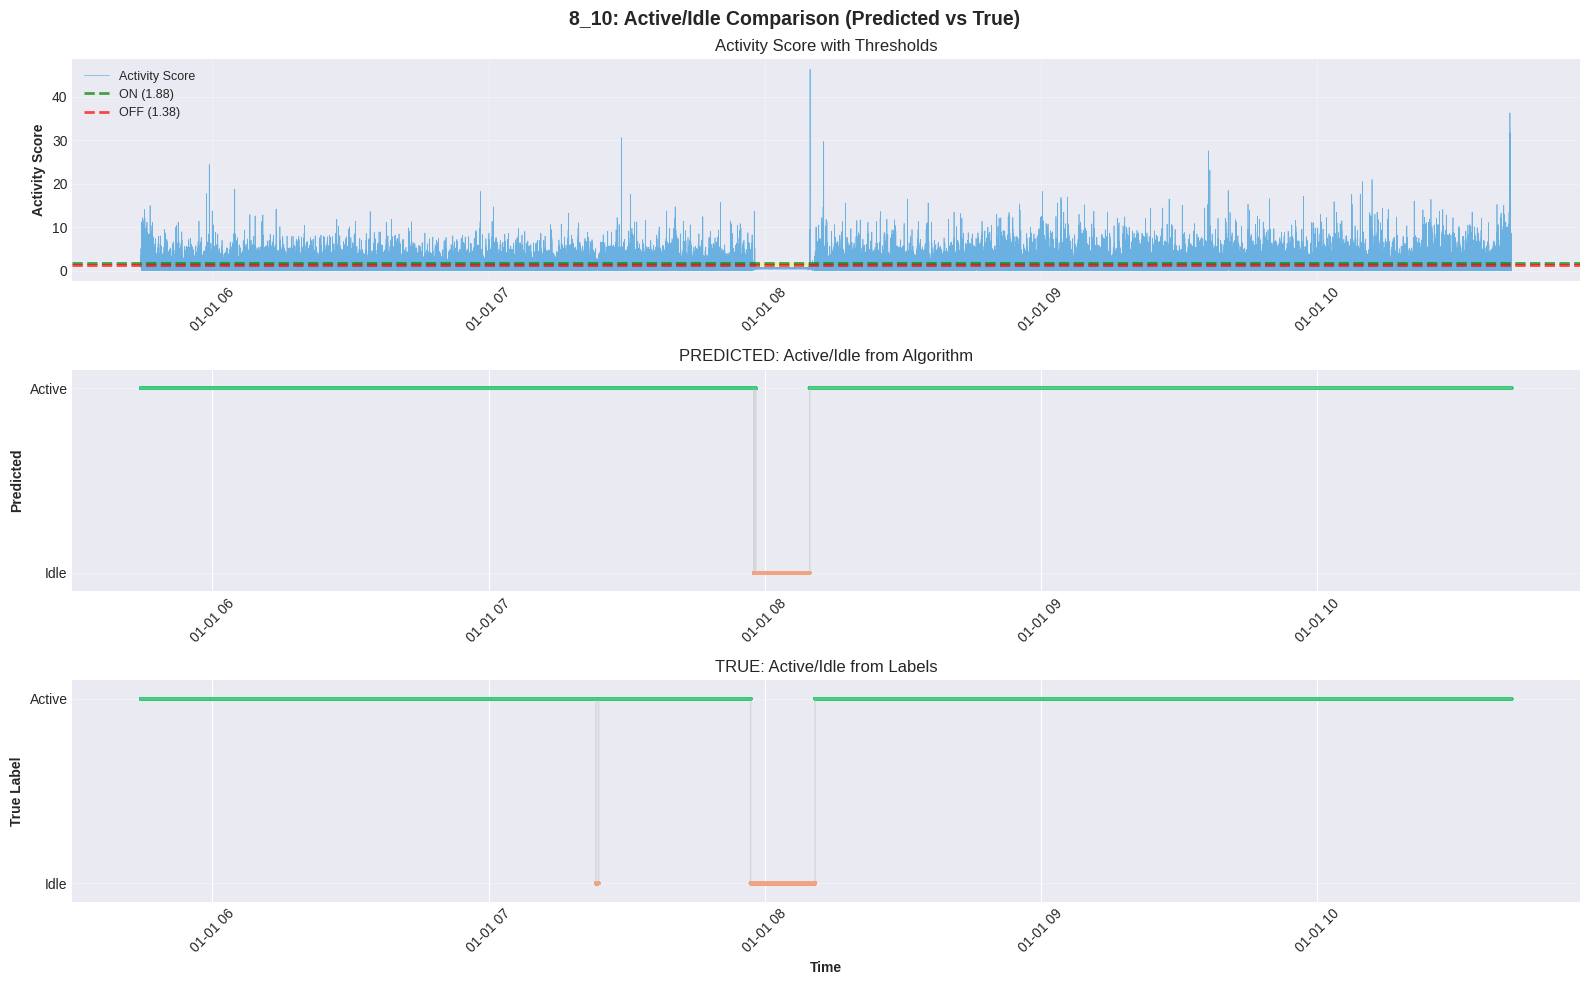

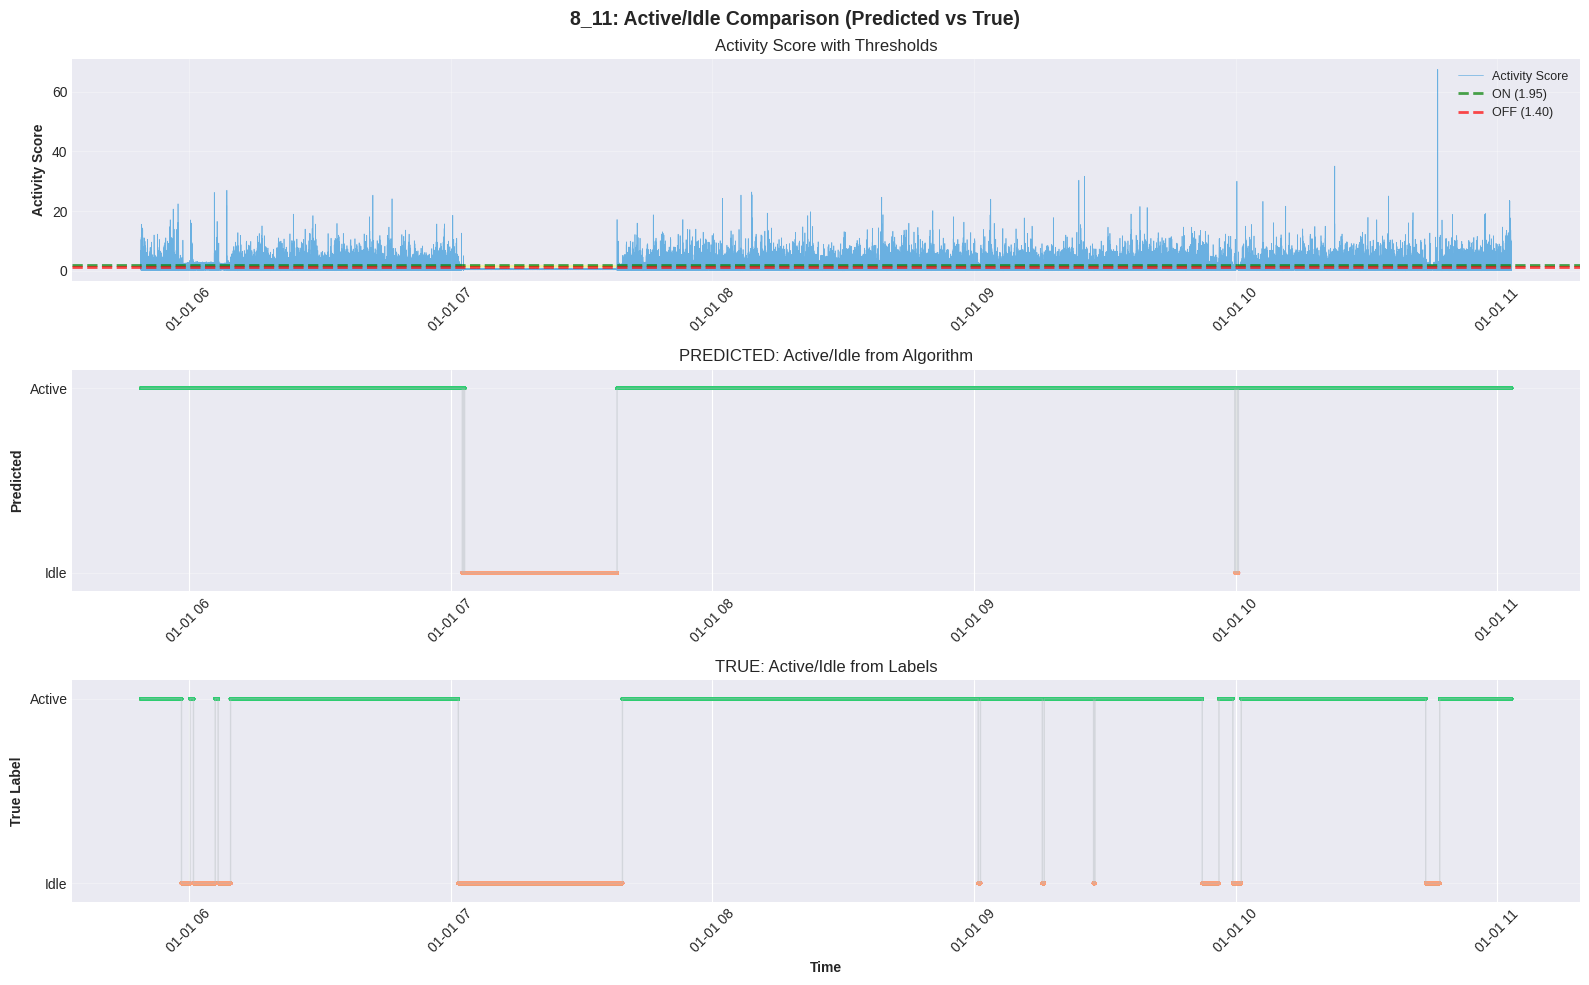

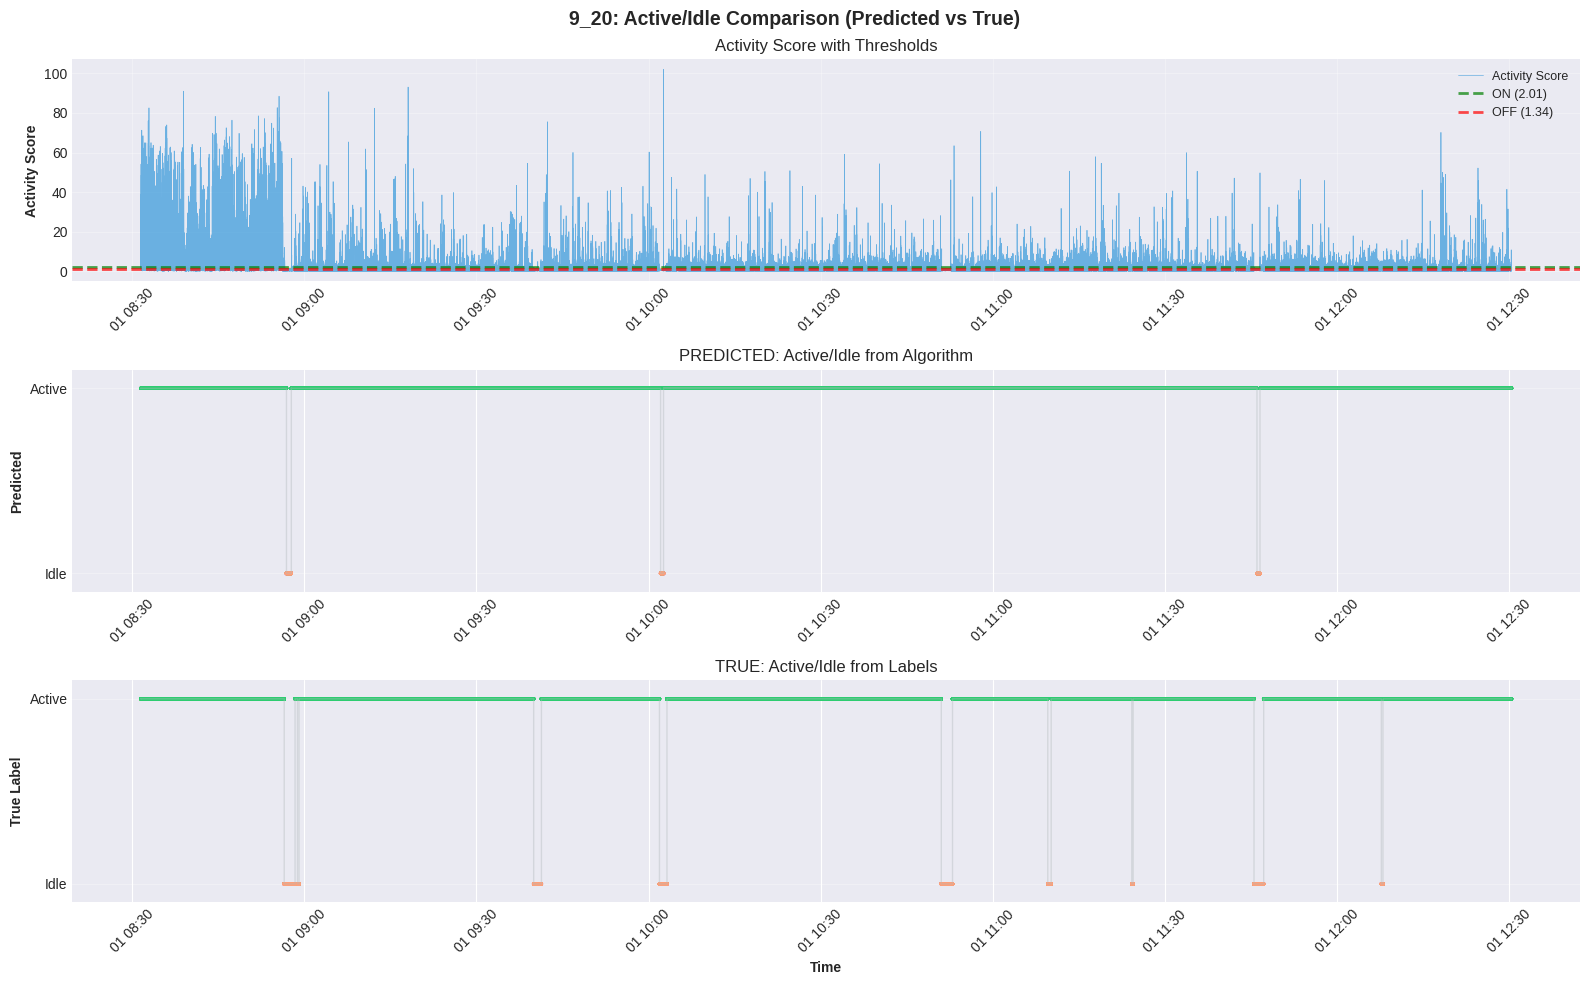

In [66]:
for date_label in raw_files.keys():
    df_clean = cleaned_data[date_label]
    activity_score = activity_scores[date_label]
    predicted = predictions[date_label]
    true_label = true_labels_dict[date_label]
    on_th = thresholds[date_label]['on']
    off_th = thresholds[date_label]['off']
    fig, axes = plt.subplots(3, 1, figsize=(16, 10))
    fig.suptitle(f'{date_label}: Active/Idle Comparison (Predicted vs True)', fontsize=14, fontweight='bold')
    ax = axes[0]
    ax.plot(df_clean['DateTime'], activity_score, color='#3498DB', linewidth=0.5, alpha=0.7, label='Activity Score')
    ax.axhline(y=on_th, color='green', linestyle='--', linewidth=2, alpha=0.7, label=f'ON ({on_th:.2f})')
    ax.axhline(y=off_th, color='red', linestyle='--', linewidth=2, alpha=0.7, label=f'OFF ({off_th:.2f})')
    ax.fill_between(df_clean['DateTime'], off_th, on_th, alpha=0.2, color='yellow')
    ax.set_ylabel('Activity Score', fontweight='bold')
    ax.set_title('Activity Score with Thresholds')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)
    ax = axes[1]
    colors_pred = np.array(['#FFA07A' if x==0 else '#2ECC71' for x in predicted])
    ax.step(df_clean['DateTime'], predicted, where='post', color='#B2BABB', linewidth=1, alpha=0.4, label='State (0=Idle, 1=Active)')
    ax.scatter(df_clean['DateTime'], predicted, c=colors_pred, s=2, alpha=0.6)
    ax.set_ylabel('Predicted', fontweight='bold')
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['Idle', 'Active'])
    ax.set_title('PREDICTED: Active/Idle from Algorithm')
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_ylim(-0.1, 1.1)
    ax = axes[2]
    colors_true = np.array(['#FFA07A' if x==0 else '#2ECC71' for x in true_label])
    ax.step(df_clean['DateTime'], true_label, where='post', color='#B2BABB', linewidth=1, alpha=0.4, label='State (0=Idle, 1=Active)')
    ax.scatter(df_clean['DateTime'], true_label, c=colors_true, s=2, alpha=0.6)
    ax.set_ylabel('True Label', fontweight='bold')
    ax.set_xlabel('Time', fontweight='bold')
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['Idle', 'Active'])
    ax.set_title('TRUE: Active/Idle from Labels')
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_ylim(-0.1, 1.1)
    for ax in axes: ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

    

## Summary

### Legend:
- **Active (1)** 🟢: Clear, Move, Masticate, Travel
- **Idle (0)** 🟠: Delay, NULL, END (Athough NULL, END already removed)

### Activity Score Formula:
$$
\text{Activity\_Score} = 0.7 \times \frac{\text{accel\_norm} - \text{accel\_median}}{\text{accel\_median} + 10^{-6}} + 0.3 \times \frac{\text{gyro\_norm} - \text{gyro\_median}}{\text{gyro\_median} + 10^{-6}}
$$

### Classification Algorithm:
- Hysteresis state machine with debouncing (10 sec)
- ON threshold: 75th percentile
- OFF threshold: 60th percentile